In [1]:
import numpy as np
import pandas as pd
import glob
import scipy as sp
import pickle
from datetime import datetime, timedelta
import time
import matplotlib.pyplot as plt
import pickle
import gc
# import cdt
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
A = ''' 12	2								1	 	18		2							 2		8		2						 		1	10		3	2				 		3		12	2					 		3			8			1		 1		1				15				 2	1						21			 			7	3	1			13		 7				3					16'''

In [4]:
Adj_A=np.reshape(A.split('\t'),(10,-1))

In [5]:
B=' 6		10	1	1	4		6	 	20							 2		1		3	3		1	 5		3	9	12	5	10	6	 2			4	5				 3		7	2	1	6	5	4	 4		4	7	7	8	7	2	 2		2	2	6		2	3'

In [6]:
Adj_B=np.reshape(B.split('\t'),(8,-1))

In [7]:
Graph_A = nx.from_numpy_matrix(Adj_A,create_using=nx.DiGraph)
Graph_B= nx.from_numpy_matrix(Adj_B,create_using=nx.DiGraph)

In [8]:
mapping_A = {0:'Children',
            1:'Colleges',
            2:'Construction',
            3:'Entertainment',
            4:'Gasoline',
            5:'Groceries',
            6:'Hospitals',
            7:'Religion',
            8:'Restaurant',
            9:'Schools',}
mapping_B = {0:'Brevard',
            1:'Brightness',
            2:'Lake',
            3:'Orange',
            4:'Osceola',
            5:'Pasco',
            6:'Polk',
            7:'Seminole',
            }
Graph_A = nx.relabel_nodes(Graph_A,mapping_A)
Graph_B = nx.relabel_nodes(Graph_B,mapping_B)

In [9]:
print('\n in degree by types')
print(nx.in_degree_centrality(Graph_A))
print('\n out degree by types')
print(nx.out_degree_centrality(Graph_A))


 in degree by types
{'Children': 0.5555555555555556, 'Colleges': 0.3333333333333333, 'Construction': 0.5555555555555556, 'Entertainment': 0.3333333333333333, 'Gasoline': 0.4444444444444444, 'Groceries': 0.4444444444444444, 'Hospitals': 0.2222222222222222, 'Religion': 0.1111111111111111, 'Restaurant': 0.2222222222222222, 'Schools': 0.2222222222222222}

 out degree by types
{'Children': 0.3333333333333333, 'Colleges': 0.2222222222222222, 'Construction': 0.3333333333333333, 'Entertainment': 0.4444444444444444, 'Gasoline': 0.3333333333333333, 'Groceries': 0.3333333333333333, 'Hospitals': 0.3333333333333333, 'Religion': 0.3333333333333333, 'Restaurant': 0.4444444444444444, 'Schools': 0.3333333333333333}


In [10]:
print('\n in degree by regions')
print(nx.in_degree_centrality(Graph_B))
print('\n out degree by regions')
print(nx.out_degree_centrality(Graph_B))


 in degree by regions
{'Brevard': 1.0, 'Brightness': 0.14285714285714285, 'Lake': 0.8571428571428571, 'Orange': 0.8571428571428571, 'Osceola': 1.0, 'Pasco': 0.7142857142857142, 'Polk': 0.5714285714285714, 'Seminole': 0.8571428571428571}

 out degree by regions
{'Brevard': 0.8571428571428571, 'Brightness': 0.14285714285714285, 'Lake': 0.7142857142857142, 'Orange': 1.0, 'Osceola': 0.42857142857142855, 'Pasco': 1.0, 'Polk': 1.0, 'Seminole': 0.8571428571428571}


In [11]:
X=list(nx.in_degree_centrality(Graph_B).keys())
Y_in=list(nx.in_degree_centrality(Graph_B).values())
Z_out=list(nx.out_degree_centrality(Graph_B).values())
X.pop(1)
Y_in.pop(1)
Z_out.pop(1)

0.14285714285714285

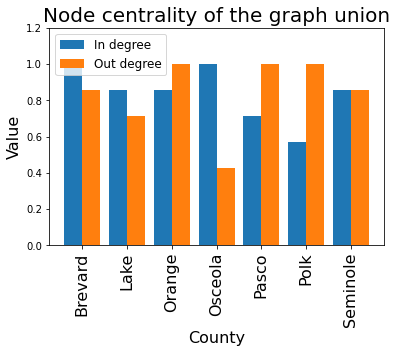

In [12]:
X_axis = np.arange(len(X))
plt.bar(X_axis-0.2,Y_in,0.4,label='In degree')
plt.bar(X_axis+0.2,Z_out,0.4,label='Out degree')
plt.xticks(X_axis,X,fontsize=16,rotation=90)
plt.xlabel("County",fontsize=16)
plt.ylabel("Value",fontsize=16)
plt.title('Node centrality of the graph union',fontsize=20)
plt.ylim([0,1.2])
plt.legend(loc='best',prop={'size': 12})
plt.show()

## Data Loading

In [13]:
with open('/mnt/d/POIdata/df_2017_Irma.pkl', 'rb') as f:
    df_2017 = pickle.load(f)

    
from itertools import product
county_name = ['Orange', 'Seminole', 'Polk','Osceola', 'Pasco', 'Lake', 'Brevard']
# county_name = ['Orange']
class_name = ['Rest','Hospitals','Religion','Schools','Gasoline','Groceries','Colleges','Children','Entertainment','Construction']
for_name = product(county_name,class_name)


In [14]:
with open('/mnt/d/POIdata/List_Brightness_2017_Irma.pkl', 'rb') as f:
    bk_restore = pickle.load(f)

for key in range(0,len(bk_restore)):
    print(key)
    Dict_Brightness = bk_restore[1]
    sat_keys_noyr = bk_restore[0]
    # arr_var=['sat_keys_noyr','List_Brightness_Orange','List_Brightness_Seminole','List_Brightness_Polk','List_Brightness_Osceola','List_Brightness_Pasco','List_Brightness_Lake','List_Brightness_Brevard']
    # exec("{}=bk_restore[key]".format(arr_var[key]))
gc.collect()

0
1


3847

## df

In [15]:
df_2017['during_disaster']=[False for i in range(0,len(df_2017['datelist']))]
df_2017['during_recovery']=[False for i in range(0,len(df_2017['datelist']))]
df_2017['period_disaster']=[False for i in range(0,len(df_2017['datelist']))]

In [16]:
np.where(df_2017['datelist']=='09/10')[0]

array([71])

In [17]:
for i in range(71,75):
    df_2017['during_disaster'][i]=True
    df_2017['period_disaster'][i]=True
for i in range(74,82):
    df_2017['during_recovery'][i]=True
    df_2017['period_disaster'][i]=True

In [18]:
import scipy.stats as stats
# import seaborn as sns

for_name = product(county_name,class_name)
df_Irma=pd.DataFrame()
# df_Irma=pd.DataFrame.from_dict(df_2017)
for i,j in for_name:
    df_Irma[i+'_'+j]=df_2017[i+'_'+j]
df_Irma['datelist']=df_2017['datelist']
df_Irma['during_disaster']=df_2017['during_disaster']
df_Irma['during_recovery']=df_2017['during_recovery']

In [19]:
df_brightness = pd.DataFrame(Dict_Brightness)
df_brightness.set_index(pd.Series(sat_keys_noyr),inplace=True)
df_brightness.columns = ['Brightness_'+i for i in list(df_brightness.columns)]

In [20]:
df_Irma.set_index('datelist',inplace=True)

In [21]:
df_Irma2 = pd.merge(df_Irma,df_brightness,left_index=True,right_index=True)

In [22]:
df_Irma2.head()

Orange_Rest  Orange_Hospitals  Orange_Religion  Orange_Schools  \
07/01     0.953399          0.612750         0.696295        0.297692   
07/02     0.785547          0.522897         1.695412        0.395351   
07/04     0.607555          0.469820         0.398936        0.262713   
07/05     0.920390          1.084191         0.834579        0.494759   
07/06     0.965556          1.165592         0.749945        0.455468   

       Orange_Gasoline  Orange_Groceries  Orange_Colleges  Orange_Children  \
07/01         0.955512          1.077483         0.347339         0.650918   
07/02         0.824357          0.992201         0.344721         0.967862   
07/04         0.716236          0.803074         0.295703         0.520907   
07/05         1.131760          0.982202         0.950295         0.921798   
07/06         1.029685          0.967099         1.080085         1.066166   

       Orange_Entertainment  Orange_Construction  Seminole_Rest  \
07/01              1.007157             0.920296       1.006749   
07/02              0.821456             0.754643       0.819660   
07/04              0.732186             0.650049       0.634205   
07/05              0.998111             0.967088       0.855122   
07/06              0.992784             1.064230       0.931876   

       Seminole_Hospitals  Seminole_Religion  Seminole_Schools  \
07/01            0.562995           0.821124          0.159545   
07/02            0.500219           1.570805          0.261301   
07/04            0.417374           0.524527          0.145396   
07/05            1.057318           0.646711          0.230065   
07/06            1.112649           0.726028          0.293749   

       Seminole_Gasoline  Seminole_Groceries  Seminole_Colleges  \
07/01           0.819219            1.061004           0.242974   
07/02           0.686126            0.997296           0.244814   
07/04           0.659700            0.903138           0.199227   
07/05           0.926459            0.881597           0.896703   
07/06           0.991803            0.922387           0.988670   

       Seminole_Children  Seminole_Entertainment  Seminole_Construction  \
07/01           0.395031                0.842190               0.932947   
07/02           0.890726                0.747539               0.849899   
07/04           0.580374                0.791274               0.581521   
07/05           0.669180                0.853618               0.863607   
07/06           0.772560                0.933592               0.849346   

       Polk_Rest  Polk_Hospitals  Polk_Religion  Polk_Schools  Polk_Gasoline  \
07/01   0.953620        0.545272       0.674893      0.208834       0.956331   
07/02   0.733038        0.459136       1.403572      0.393522       0.794273   
07/04   0.540939        0.425140       0.560852      0.178736       0.712328   
07/05   0.804017        1.014027       0.833012      0.378710       0.932654   
07/06   0.952378        1.072363       0.854032      0.431432       0.973803   

       Polk_Groceries  Polk_Colleges  Polk_Children  Polk_Entertainment  \
07/01        1.091840       0.214181       0.658051            0.908915   
07/02        0.988263       0.080483       0.836904            0.672329   
07/04        0.905608       0.133220       0.452767            0.706707   
07/05        0.888639       0.428735       0.590512            0.856596   
07/06        0.959136       0.725116       0.743038            0.932508   

       Polk_Construction  Osceola_Rest  Osceola_Hospitals  Osceola_Religion  \
07/01           1.072385      1.009236           0.675853          0.705608   
07/02           0.783599      0.903930           0.539525          1.530146   
07/04           0.759470      0.674454           0.561590          0.525696   
07/05           0.879801      0.879526           1.105163          0.668314   
07/06           0.891531      0.982379           1.155823          0.771742   

       Osceola_Schools  Osceola_Gasoli

In [23]:
col_avail=list(df_Irma2.columns)
col_df_Irma2 = col_avail[0:70]+['Brightness_Orange_Rest','Brightness_Seminole_Rest','Brightness_Polk_Rest','Brightness_Osceola_Rest','Brightness_Pasco_Rest','Brightness_Lake_Rest','Brightness_Brevard_Rest']
data = df_Irma2.loc[:,col_df_Irma2].copy()
col_df_Irma2 = col_avail[0:70]+['Brightness_Orange_Rest','Brightness_Seminole_Rest','Brightness_Polk_Rest','Brightness_Osceola_Rest','Brightness_Brevard_Rest']
data = df_Irma2.loc[:,col_df_Irma2].copy()

In [24]:
# df_Irma2_corr = df_Irma2.loc[:,['Brightness' not in i for i in df_Irma2.columns]].corr()
df_Irma2_corr = df_Irma2.corr()

In [25]:
df_Irma2.loc[:,['Orange' in i for i in df_Irma2.columns]].corr()

Orange_Rest  Orange_Hospitals  \
Orange_Rest                         1.000000          0.602388   
Orange_Hospitals                    0.602388          1.000000   
Orange_Religion                     0.175481         -0.214613   
Orange_Schools                      0.340236          0.701233   
Orange_Gasoline                     0.865686          0.716721   
Orange_Groceries                    0.817809          0.387111   
Orange_Colleges                     0.490869          0.712397   
Orange_Children                     0.578100          0.629924   
Orange_Entertainment                0.900941          0.432839   
Orange_Construction                 0.793746          0.730136   
Brightness_Orange_Rest              0.099549          0.028897   
Brightness_Orange_Hospitals         0.092839          0.029753   
Brightness_Orange_Religion          0.091708          0.023298   
Brightness_Orange_Schools           0.100107          0.031538   
Brightness_Orange_Gasoline          0.092378          0.020048   
Brightness_Orange_Groceries         0.098338          0.027530   
Brightness_Orange_Colleges          0.097421          0.032191   
Brightness_Orange_Children          0.090208          0.030130   
Brightness_Orange_Entertainment     0.109026          0.031684   
Brightness_Orange_Construction      0.092831          0.024090   

                                 Orange_Religion  Orange_Schools  \
Orange_Rest                             0.175481        0.340236   
Orange_Hospitals                       -0.214613        0.701233   
Orange_Religion                         1.000000       -0.055670   
Orange_Schools                         -0.055670        1.000000   
Orange_Gasoline                         0.034518        0.405862   
Orange_Groceries                        0.306138        0.107752   
Orange_Colleges                         0.048813        0.732881   
Orange_Children                         0.477494        0.576062   
Orange_Entertainment                    0.174469        0.124889   
Orange_Construction                     0.010071        0.412195   
Brightness_Orange_Rest                  0.118352        0.134239   
Brightness_Orange_Hospitals             0.120985        0.128148   
Brightness_Orange_Religion              0.128503        0.128445   
Brightness_Orange_Schools               0.129175        0.139388   
Brightness_Orange_Gasoline              0.133754        0.123789   
Brightness_Orange_Groceries             0.123982        0.128800   
Brightness_Orange_Colleges              0.128580        0.130842   
Brightness_Orange_Children              0.121618        0.135194   
Brightness_Orange_Entertainment         0.128299        0.125982   
Brightness_Orange_Construction          0.133830        0.118405   

                                 Orange_Gasoline  Orange_Groceries  \
Orange_Rest                             0.865686          0.817809   
Orange_Hospitals                        0.716721          0.387111   
Orange_Religion                         0.034518          0.306138   
Orange_Schools                          0.405862          0.107752   
Orange_Gasoline                         1.000000          0.844744   
Orange_Groceries                        0.844744          1.000000   
Orange_Colleges                         0.500674          0.244317   
Orange_Children                         0.615633          0.502668   
Orange_Entertainment                    0.722682          0.785116   
Orange_Construction                     0.915562          0.794350   
Brightness_Orange_Rest                  0.045098          0.054786   
Brightness_Orange_Hospitals             0.037444          0.048143   
Brightness_Orange_Religion              0.033522          0.045434   
Brightness_Orange_Schools               0.039766          0.049989   
Brightness_Orange_Gasoline              0.035384          0.048972   
Brightness_Orange_Groceries             0.041963          0.055160   
Brightness_Orange_Colleges 

In [26]:
index_list = list(df_Irma2.index)

In [27]:
index_list2 = [datetime.strptime(i,'%m/%d').strftime('%b. %d') for i in index_list]

In [28]:
df_Irma2.loc[index_list[0:7],col_df_Irma2].copy()

Orange_Rest  Orange_Hospitals  Orange_Religion  Orange_Schools  \
07/01     0.953399          0.612750         0.696295        0.297692   
07/02     0.785547          0.522897         1.695412        0.395351   
07/04     0.607555          0.469820         0.398936        0.262713   
07/05     0.920390          1.084191         0.834579        0.494759   
07/06     0.965556          1.165592         0.749945        0.455468   
07/07     0.985737          1.030928         0.564870        0.372661   
07/08     0.891292          0.608938         0.849669        0.324305   

       Orange_Gasoline  Orange_Groceries  Orange_Colleges  Orange_Children  \
07/01         0.955512          1.077483         0.347339         0.650918   
07/02         0.824357          0.992201         0.344721         0.967862   
07/04         0.716236          0.803074         0.295703         0.520907   
07/05         1.131760          0.982202         0.950295         0.921798   
07/06         1.029685          0.967099         1.080085         1.066166   
07/07         1.095855          0.969025         0.591010         0.891767   
07/08         0.845603          0.953999         0.326357         0.690832   

       Orange_Entertainment  Orange_Construction  Seminole_Rest  \
07/01              1.007157             0.920296       1.006749   
07/02              0.821456             0.754643       0.819660   
07/04              0.732186             0.650049       0.634205   
07/05              0.998111             0.967088       0.855122   
07/06              0.992784             1.064230       0.931876   
07/07              0.925812             1.074297       1.034616   
07/08              0.924959             0.932472       0.934328   

       Seminole_Hospitals  Seminole_Religion  Seminole_Schools  \
07/01            0.562995           0.821124          0.159545   
07/02            0.500219           1.570805          0.261301   
07/04            0.417374           0.524527          0.145396   
07/05            1.057318           0.646711          0.230065   
07/06            1.112649           0.726028          0.293749   
07/07            0.970306           0.489177          0.265790   
07/08            0.508173           0.717645          0.234093   

       Seminole_Gasoline  Seminole_Groceries  Seminole_Colleges  \
07/01           0.819219            1.061004           0.242974   
07/02           0.686126            0.997296           0.244814   
07/04           0.659700            0.903138           0.199227   
07/05           0.926459            0.881597           0.896703   
07/06           0.991803            0.922387           0.988670   
07/07           0.949258            0.955619           0.362595   
07/08           0.815711            0.937836           0.245753   

       Seminole_Children  Seminole_Entertainment  Seminole_Construction  \
07/01           0.395031                0.842190               0.932947   
07/02           0.890726                0.747539               0.849899   
07/04           0.580374                0.791274               0.581521   
07/05           0.669180                0.853618               0.863607   
07/06           0.772560                0.933592               0.849346   
07/07           0.828644                0.940445               0.869567   
07/08           0.705454                0.867836               0.881467   

       Polk_Rest  Polk_Hospitals  Polk_Religion  Polk_Schools  Polk_Gasoline  \
07/01   0.953620        0.545272       0.674893      0.208834       0.956331   
07/02   0.733038        0.459136       1.403572      0.393522       0.794273   
07/04   0.540939        0.425140       0.560852      0.178736       0.712328   
07/05   0.804017        1.014027       0.833012      0.378710       0.932654   
07/06   0.952378        1.072363       0.854032      0.431432       0.973803   
07/07   1.027169        0.940294       0.586409      0.313886       1.014307   
07/08   0.918186        0.480885 

In [29]:
from statsmodels.tsa.stattools import grangercausalitytests

In [30]:
maxlag = 12
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In [31]:
df_Irma3 = df_Irma2.loc[:,'Orange_Rest':'Orange_Construction']

In [32]:
df_Irma3['Brightness_Orange'] = df_Irma2['Brightness_Orange_Rest'].copy()

In [33]:
# gc_matrix = grangers_causation_matrix(df_Irma2.loc[:,['Orange_Rest','Orange_Hospitals']],variables = ['Orange_Rest','Orange_Hospitals'])
gc_matrix = grangers_causation_matrix(df_Irma3,variables = df_Irma3.columns)

In [34]:
gc_matrix_params = grangers_causation_matrix(df_Irma3,variables = df_Irma3.columns,test='params_ftest')

In [35]:
gc_matrix_params

Orange_Rest_x  Orange_Hospitals_x  Orange_Religion_x  \
Orange_Rest_y                  0.0000              0.0000             0.0000   
Orange_Hospitals_y             0.0000              0.0000             0.0000   
Orange_Religion_y              0.0000              0.0000             0.0000   
Orange_Schools_y               0.0000              0.0061             0.0000   
Orange_Gasoline_y              0.0002              0.0000             0.0000   
Orange_Groceries_y             0.0005              0.0185             0.0023   
Orange_Colleges_y              0.0000              0.0000             0.0000   
Orange_Children_y              0.0001              0.0000             0.0000   
Orange_Entertainment_y         0.0000              0.0000             0.0000   
Orange_Construction_y          0.0001              0.0000             0.0000   
Brightness_Orange_y            0.4855              0.2872             0.7816   

                        Orange_Schools_x  Orange_Gasoline_x  \
Orange_Rest_y                     0.0000             0.0000   
Orange_Hospitals_y                0.0488             0.0000   
Orange_Religion_y                 0.0000             0.0000   
Orange_Schools_y                  0.0000             0.0055   
Orange_Gasoline_y                 0.0000             0.0000   
Orange_Groceries_y                0.0065             0.0000   
Orange_Colleges_y                 0.0003             0.0000   
Orange_Children_y                 0.0005             0.0009   
Orange_Entertainment_y            0.0000             0.0000   
Orange_Construction_y             0.0001             0.0026   
Brightness_Orange_y               0.2149             0.3450   

                        Orange_Groceries_x  Orange_Colleges_x  \
Orange_Rest_y                       0.0008             0.0000   
Orange_Hospitals_y                  0.0000             0.0000   
Orange_Religion_y                   0.0000             0.0000   
Orange_Schools_y                    0.0958             0.0000   
Orange_Gasoline_y                   0.0039             0.0000   
Orange_Groceries_y                  0.0000             0.0222   
Orange_Colleges_y                   0.0122             0.0000   
Orange_Children_y                   0.0024             0.0000   
Orange_Entertainment_y              0.0016             0.0000   
Orange_Construction_y               0.0013             0.0020   
Brightness_Orange_y                 0.2832             0.3389   

                        Orange_Children_x  Orange_Entertainment_x  \
Orange_Rest_y                      0.0001                  0.0000   
Orange_Hospitals_y                 0.0000                  0.0000   
Orange_Religion_y                  0.0000                  0.0000   
Orange_Schools_y                   0.0040                  0.0001   
Orange_Gasoline_y                  0.0000                  0.0000   
Orange_Groceries_y                 0.0096                  0.0187   
Orange_Colleges_y                  0.0008                  0.0000   
Orange_Children_y                  0.0000                  0.0001   
Orange_Entertainment_y             0.0000                  0.0000   
Orange_Construction_y              0.0000                  0.0000   
Brightness_Orange_y                0.2114                  0.2342   

                        Orange_Construction_x  Brightness_Orange_x  
Orange_Rest_y                          0.0001               0.5879  
Orange_Hospitals_y                     0.0000               0.3334  
Orange_Religion_y                      0.0000               0.0637  
Orange_Schools_y                       0.1323               0.0426  
Orange_Gasoline_y                      0.0868               0.5234  
Orange_Groceries_y                     0.0001               0.3420  
Orange_Colleges_y                      0.0000               0.1586  
Orange_Children_y                      0.0003               0.0134  
Orange_Entertainment_y                 0.0000               0.4328  
Orange

In [36]:
gc_matrix.to_csv('grangercausality_ssr2_chi2test.csv')

In [37]:
gc_matrix

Orange_Rest_x  Orange_Hospitals_x  Orange_Religion_x  \
Orange_Rest_y                  1.0000              0.0000             0.0000   
Orange_Hospitals_y             0.0000              1.0000             0.0000   
Orange_Religion_y              0.0000              0.0000             1.0000   
Orange_Schools_y               0.0000              0.0034             0.0000   
Orange_Gasoline_y              0.0001              0.0000             0.0000   
Orange_Groceries_y             0.0003              0.0165             0.0009   
Orange_Colleges_y              0.0000              0.0000             0.0000   
Orange_Children_y              0.0000              0.0000             0.0000   
Orange_Entertainment_y         0.0000              0.0000             0.0000   
Orange_Construction_y          0.0000              0.0000             0.0000   
Brightness_Orange_y            0.3280              0.1524             0.7708   

                        Orange_Schools_x  Orange_Gasoline_x  \
Orange_Rest_y                     0.0000             0.0000   
Orange_Hospitals_y                0.0292             0.0000   
Orange_Religion_y                 0.0000             0.0000   
Orange_Schools_y                  1.0000             0.0040   
Orange_Gasoline_y                 0.0000             1.0000   
Orange_Groceries_y                0.0014             0.0000   
Orange_Colleges_y                 0.0001             0.0000   
Orange_Children_y                 0.0001             0.0001   
Orange_Entertainment_y            0.0000             0.0000   
Orange_Construction_y             0.0000             0.0002   
Brightness_Orange_y               0.2094             0.3236   

                        Orange_Groceries_x  Orange_Colleges_x  \
Orange_Rest_y                       0.0000             0.0000   
Orange_Hospitals_y                  0.0000             0.0000   
Orange_Religion_y                   0.0000             0.0000   
Orange_Schools_y                    0.0648             0.0000   
Orange_Gasoline_y                   0.0028             0.0000   
Orange_Groceries_y                  1.0000             0.0200   
Orange_Colleges_y                   0.0015             1.0000   
Orange_Children_y                   0.0018             0.0000   
Orange_Entertainment_y              0.0001             0.0000   
Orange_Construction_y               0.0007             0.0001   
Brightness_Orange_y                 0.2181             0.3336   

                        Orange_Children_x  Orange_Entertainment_x  \
Orange_Rest_y                      0.0000                  0.0000   
Orange_Hospitals_y                 0.0000                  0.0000   
Orange_Religion_y                  0.0000                  0.0000   
Orange_Schools_y                   0.0014                  0.0001   
Orange_Gasoline_y                  0.0000                  0.0000   
Orange_Groceries_y                 0.0023                  0.0029   
Orange_Colleges_y                  0.0000                  0.0000   
Orange_Children_y                  1.0000                  0.0000   
Orange_Entertainment_y             0.0000                  1.0000   
Orange_Construction_y              0.0000                  0.0000   
Brightness_Orange_y                0.2060                  0.2184   

                        Orange_Construction_x  Brightness_Orange_x  
Orange_Rest_y                          0.0000               0.4560  
Orange_Hospitals_y                     0.0000               0.2586  
Orange_Religion_y                      0.0000               0.0599  
Orange_Schools_y                       0.0651               0.0366  
Orange_Gasoline_y                      0.0733               0.3666  
Orange_Groceries_y                     0.0001               0.2842  
Orange_Colleges_y                      0.0000               0.1533  
Orange_Children_y                      0.0002               0.0118  
Orange_Entertainment_y                 0.0000               0.3422  
Orange

In [ ]:
df_Irma2.loc[:,['Orange_Rest']]

Text(Sep. 13, 0.27, 'Sep. 13: Dissipation of hurricane Irma')

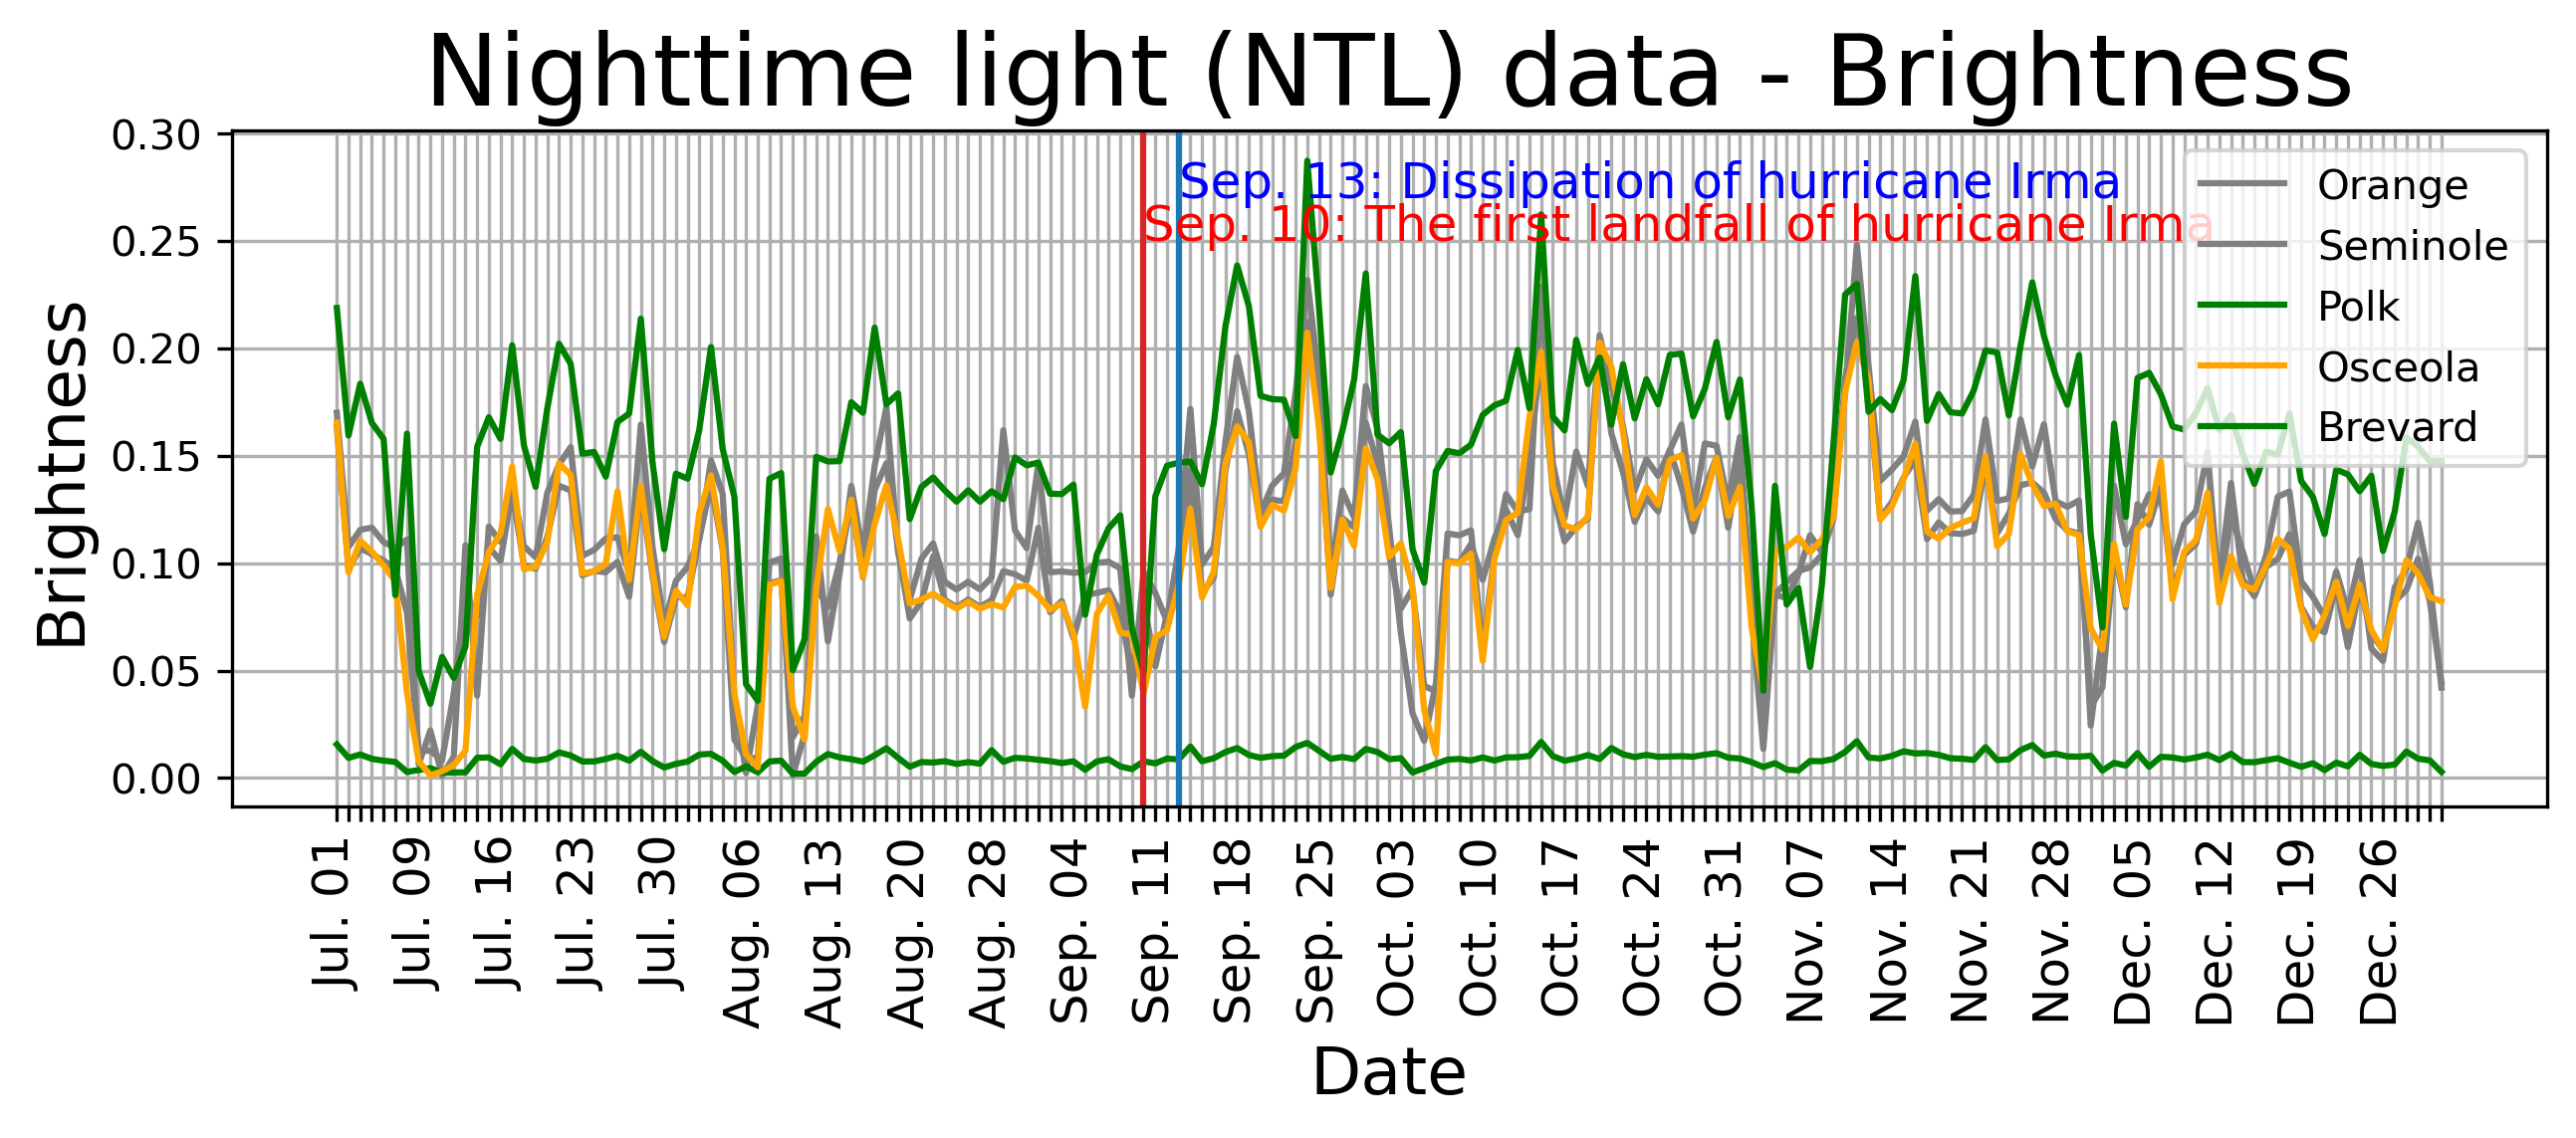

In [40]:
fig, ax1 = plt.subplots()
fig.set_size_inches(10,3)
fig.set_dpi(300)
#county_name = ['Orange', 'Seminole', 'Polk','Osceola', 'Pasco', 'Lake', 'Brevard']
color_list = ['grey','grey','green','orange','grey','orange','green']

ax1.plot(index_list2,df_Irma2['Brightness_Orange_Rest'],label='Orange',c=color_list[0])
ax1.plot(index_list2,df_Irma2['Brightness_Seminole_Rest'],label='Seminole',c=color_list[1])
ax1.plot(index_list2,df_Irma2['Brightness_Polk_Rest'],label='Polk',c=color_list[2])
ax1.plot(index_list2,df_Irma2['Brightness_Osceola_Rest'],label='Osceola',c=color_list[3])
ax1.plot(index_list2,df_Irma2['Brightness_Brevard_Rest'],label='Brevard',c=color_list[6])
plt.grid(True)
plt.xticks(fontsize=12,rotation=90)
plt.axvline(x='Sep. 10',color='tab:red')
plt.axvline(x='Sep. 13',color='tab:blue')
i=0
for label in ax1.get_xticklabels():
    if (i % 7 == 0):
        label.set_visible(True)
    else:
        label.set_visible(False)
    i+=1
plt.xlabel('Date',fontsize=16)
plt.ylabel('Brightness',fontsize=16)
plt.legend(loc='best')
plt.title('Nighttime light (NTL) data - Brightness',fontsize=24)
plt.text(x='Sep. 10',y=0.25,s='Sep. 10: The first landfall of hurricane Irma',fontsize=12,c='red')    
plt.text(x='Sep. 13',y=0.27,s='Sep. 13: Dissipation of hurricane Irma',fontsize=12,c='blue')  

In [41]:
county_name2 = ['Brevard']

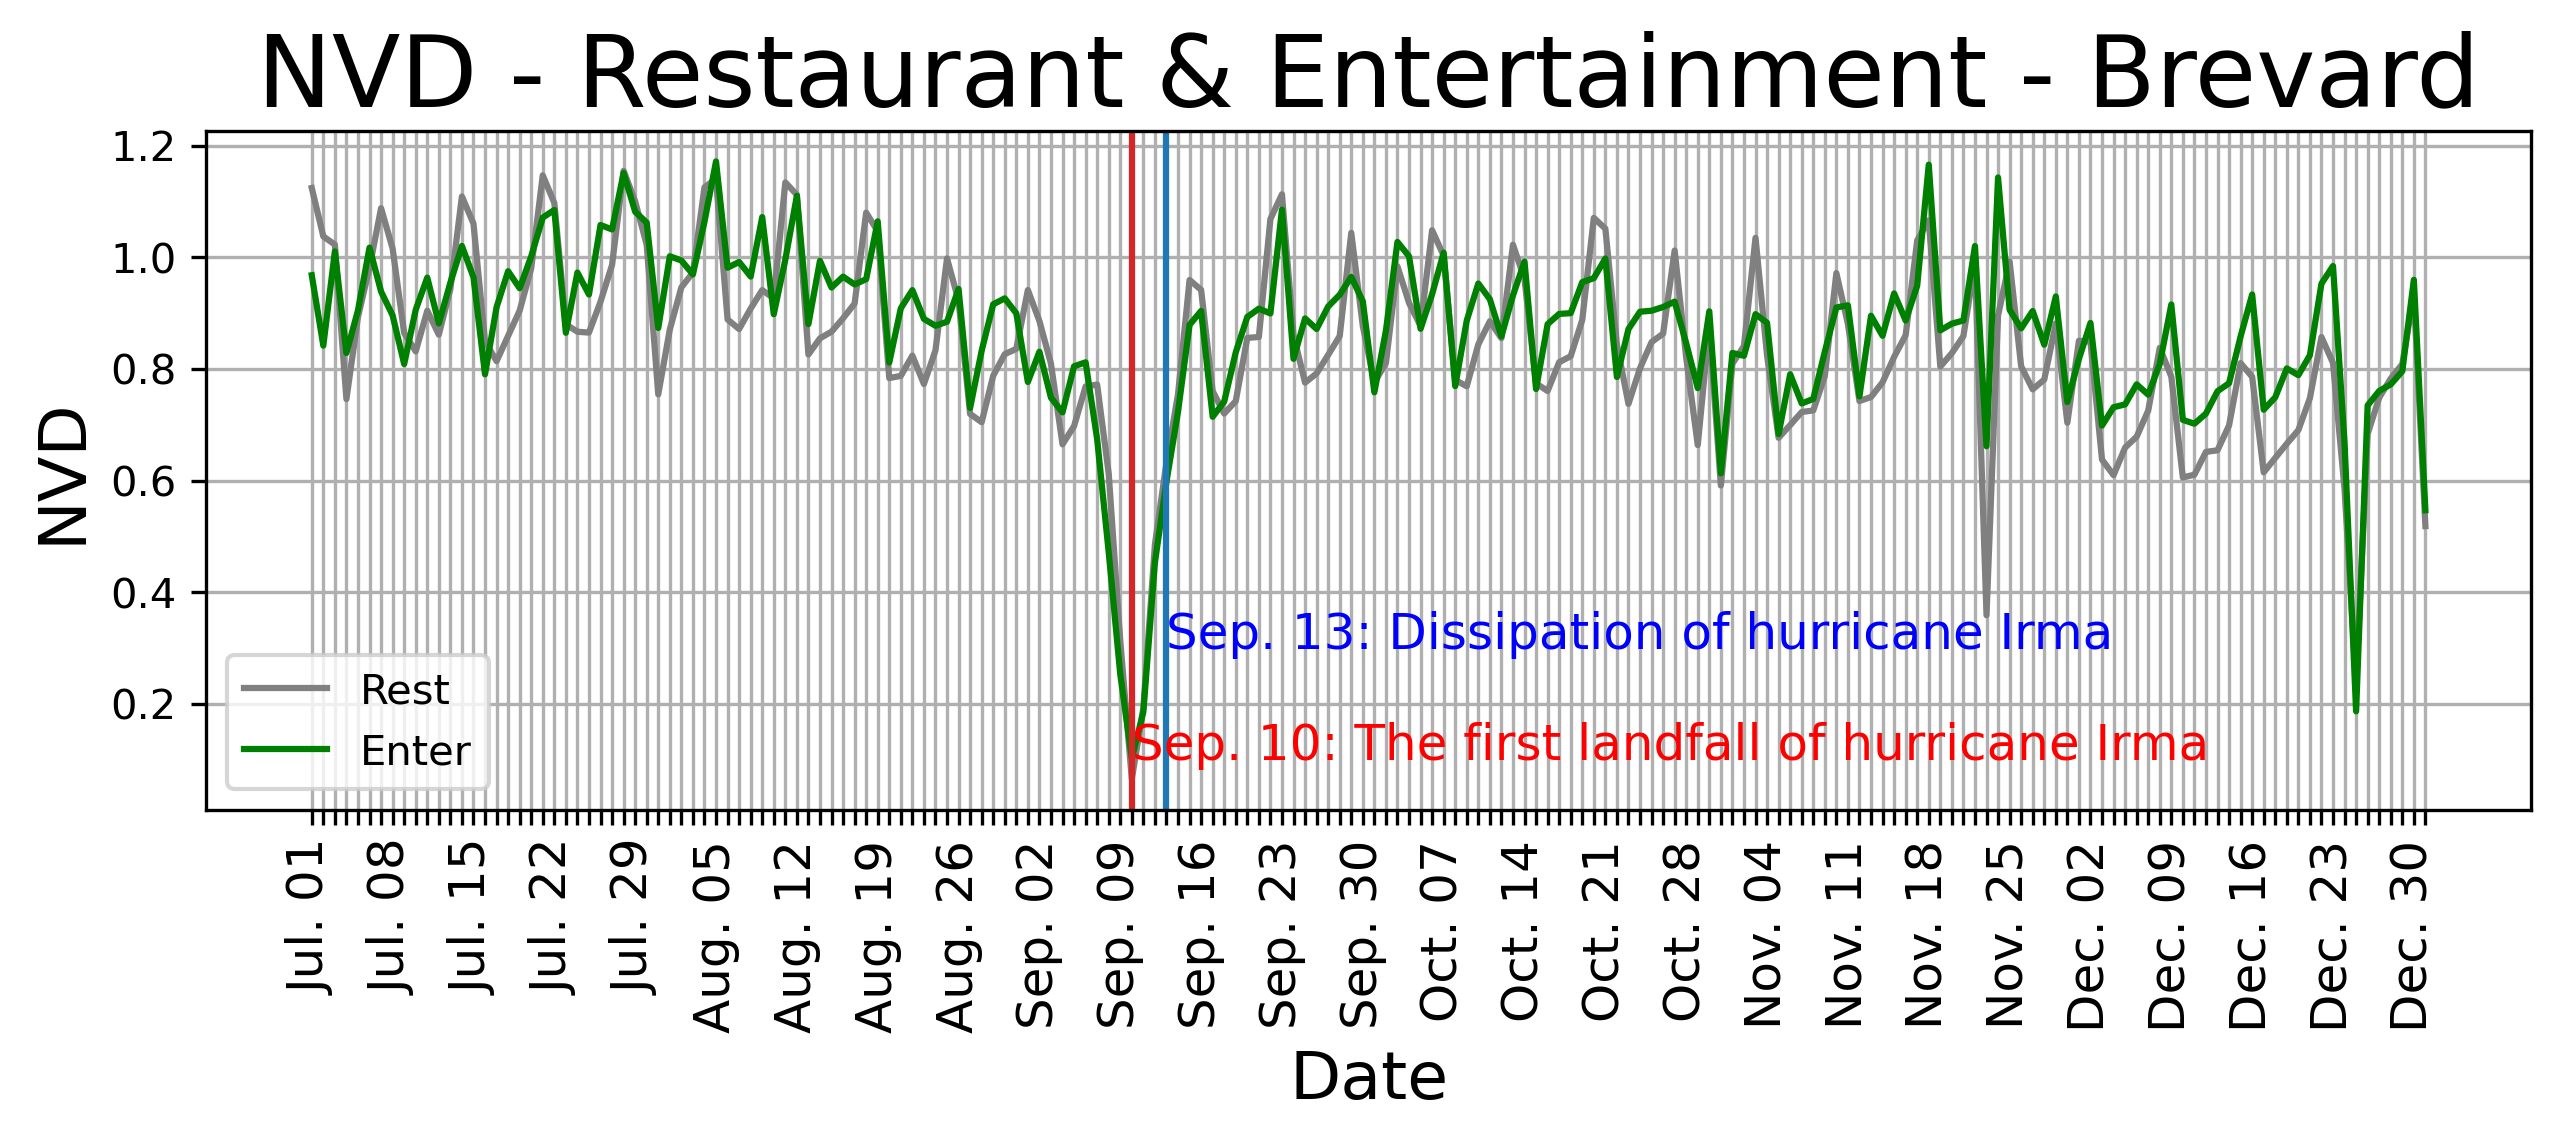

In [42]:
j='Rest'
l = 'Restaurant & Entertainment'
fig, ax1 = plt.subplots()
fig.set_size_inches(10,3)
fig.set_dpi(300)
series_type='trend'
df_2017_corr_county = pd.DataFrame()
# color_list = ['C1','C0','C2','C3','C4','C5','C6']
#county_name = ['Orange', 'Seminole', 'Polk','Osceola', 'Pasco', 'Lake', 'Brevard']
color_list = ['grey','grey','green','orange','grey','orange','green']
color_list2 = ['green','green','grey','red','green','red','grey']
k=0
for i in county_name2:
    base = datetime(2017,7,1)
    numdays = len(df_2017[i+'_'+j])
    datelist = pd.date_range(base,periods=numdays).strftime("%b. %d")    
    xaxis = datelist.copy()
    yaxis = df_2017[i+'_'+j]
    plt.plot(xaxis,yaxis,c=color_list[k])
    k+=1

j='Entertainment'
k=0
for i in county_name2:
    base = datetime(2017,7,1)
    numdays = len(df_2017[i+'_'+j])
    datelist = pd.date_range(base,periods=numdays).strftime("%b. %d")    
    xaxis = datelist.copy()
    yaxis = df_2017[i+'_'+j]
    plt.plot(xaxis,yaxis,c=color_list2[k])
#     plt.legend(county_name2)
    k+=1
plt.text(x='Sep. 10',y=0.1,s='Sep. 10: The first landfall of hurricane Irma',fontsize=12,c='red')    
plt.text(x='Sep. 13',y=0.3,s='Sep. 13: Dissipation of hurricane Irma',fontsize=12,c='blue')    
plt.title('NVD - '+l+' - '+county_name2[0],fontsize=24)
plt.grid(True)
k=0
plt.xticks(xaxis,fontsize=12,rotation=90)
plt.xlabel('Date',fontsize=16)
plt.ylabel('NVD',fontsize=16)
plt.axvline(x='Sep. 10',color='tab:red')
plt.axvline(x='Sep. 13',color='tab:blue')
plt.legend(['Rest','Enter'])
for label in plt.xticks()[1]:
    if (int(k) % 7 == 0):
        label.set_visible(True)
    else:
        label.set_visible(False)
    k+=1


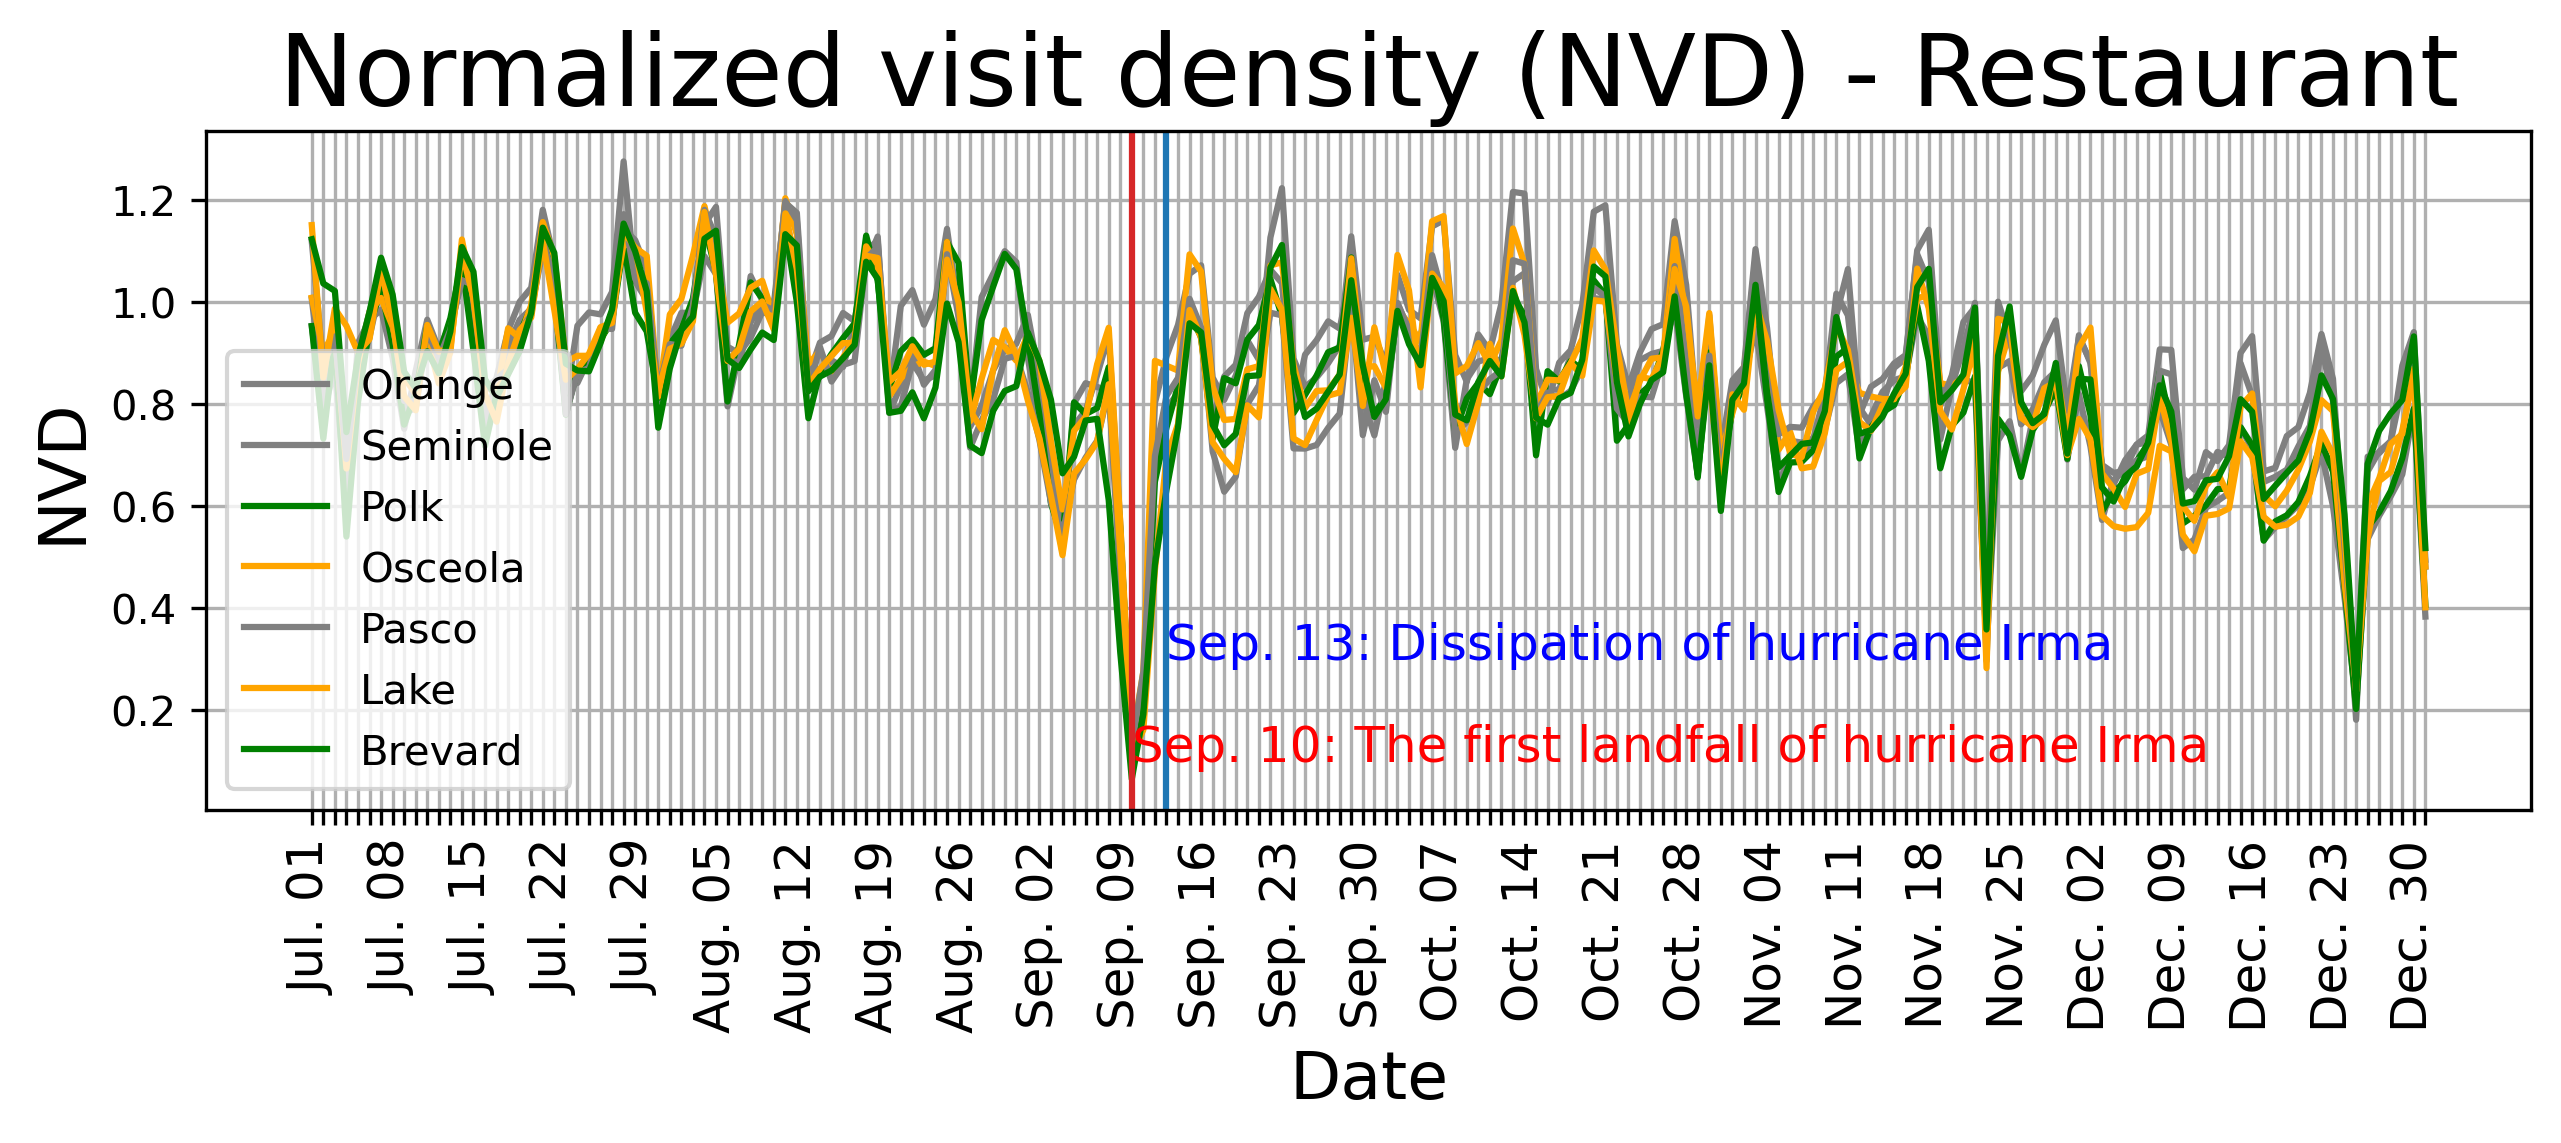

In [43]:
j='Rest'
l='Restaurant'
fig, ax1 = plt.subplots()
fig.set_size_inches(10,3)
fig.set_dpi(300)
series_type='trend'
df_2017_corr_county = pd.DataFrame()
# color_list = ['C1','C0','C2','C3','C4','C5','C6']
#county_name = ['Orange', 'Seminole', 'Polk','Osceola', 'Pasco', 'Lake', 'Brevard']
color_list = ['grey','grey','green','orange','grey','orange','green']
k=0
for i in county_name:
    base = datetime(2017,7,1)
    numdays = len(df_2017[i+'_'+j])
    datelist = pd.date_range(base,periods=numdays).strftime("%b. %d")    
    xaxis = datelist.copy()
    yaxis = df_2017[i+'_'+j]
    plt.plot(xaxis,yaxis,c=color_list[k])
    plt.legend(county_name)
    k+=1
plt.text(x='Sep. 10',y=0.1,s='Sep. 10: The first landfall of hurricane Irma',fontsize=12,c='red')    
plt.text(x='Sep. 13',y=0.3,s='Sep. 13: Dissipation of hurricane Irma',fontsize=12,c='blue')    
plt.title('Normalized visit density (NVD) - '+l,fontsize=24)
plt.grid(True)
k=0
plt.xticks(xaxis,fontsize=12,rotation=90)
plt.xlabel('Date',fontsize=16)
plt.ylabel('NVD',fontsize=16)
plt.axvline(x='Sep. 10',color='tab:red')
plt.axvline(x='Sep. 13',color='tab:blue')
for label in plt.xticks()[1]:
    if (int(k) % 7 == 0):
        label.set_visible(True)
    else:
        label.set_visible(False)
    k+=1


# Figure 4 (e)

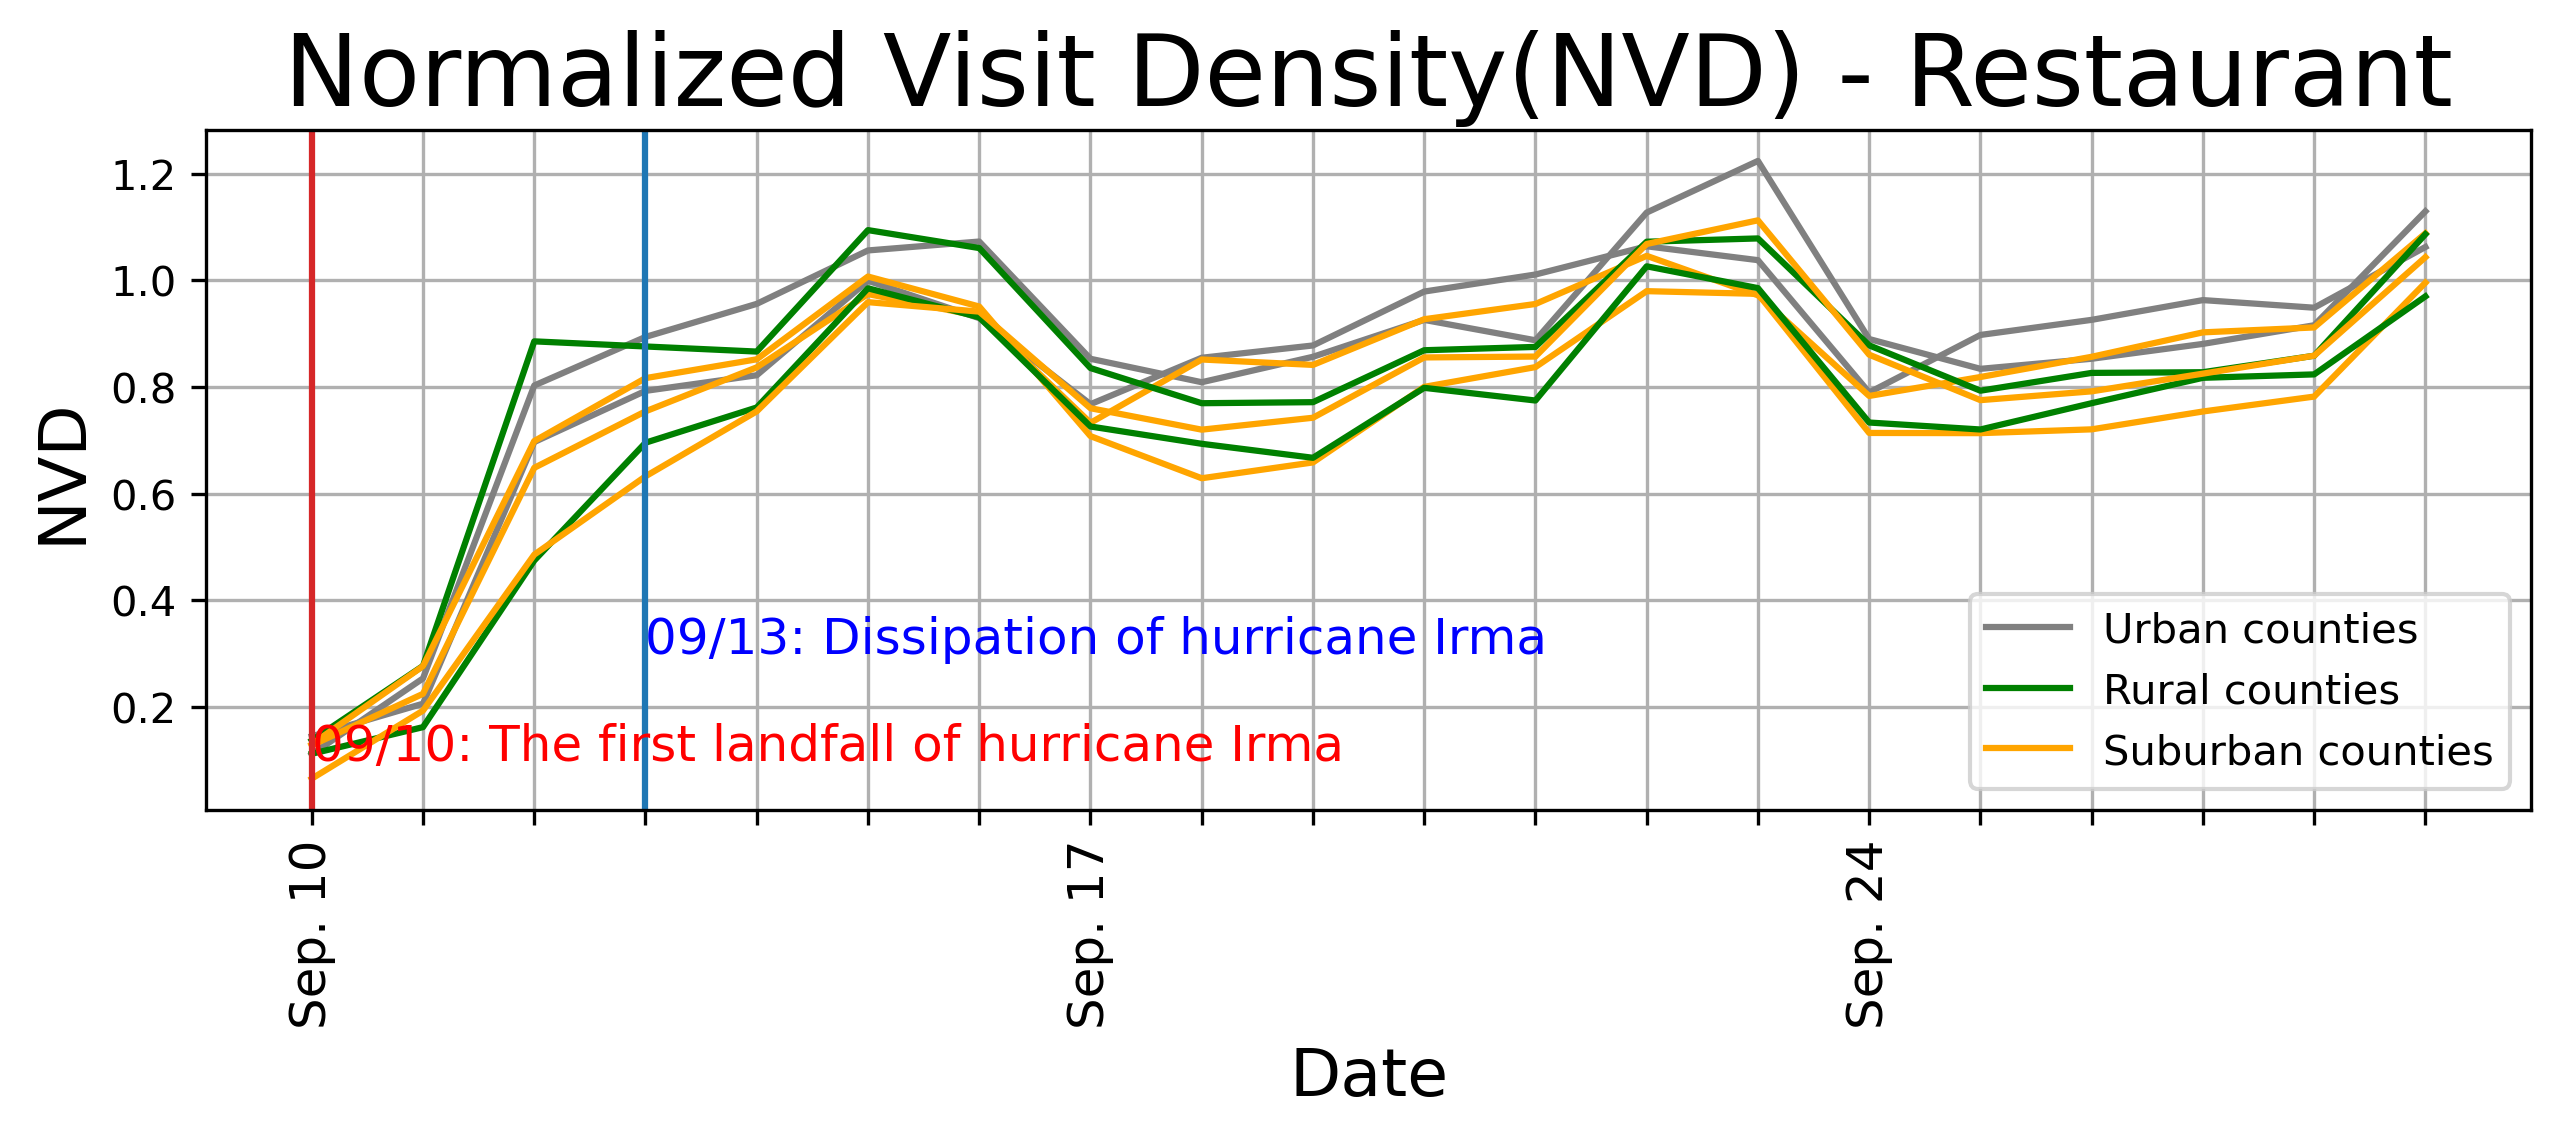

In [44]:
from matplotlib.lines import Line2D
j='Rest'
fig, ax1 = plt.subplots()
fig.set_size_inches(10,3)
fig.set_dpi(300)
series_type='trend'
df_2017_corr_county = pd.DataFrame()
# color_list = ['C1','C0','C2','C3','C4','C5','C6']
color_list = ['grey','grey','orange','green','orange','green','orange']
k=0
for i in county_name:
    base = datetime(2017,7,1)
    numdays = len(df_2017[i+'_'+j])
    datelist = pd.date_range(base,periods=numdays).strftime("%b. %d")    
    # results = seasonal_decompose(df_2017[i+'_'+j],model='additive',period=period)
    # switcher = {'observed': trends,'trend': results.trend,'resid':results.resid, 'seasonal':results.seasonal}
#     trends = switcher.get(series_type,np.nan)
    xaxis = datelist[list(datelist).index('Sep. 10'):(list(datelist).index('Sep. 10')+20)]
    yaxis = df_2017[i+'_'+j][list(datelist).index('Sep. 10'):(list(datelist).index('Sep. 10')+20)]
    plt.plot(xaxis,yaxis,c=color_list[k])
    # plt.plot(datelist,results.trend+results.resid)
    # df_2017_corr_county[i]=results.trend+results.resid+results.seasonal
    k+=1

legend_elements = [Line2D([0],[0],color='grey',label='Urban counties'),
                  Line2D([0],[0],color='green',label='Rural counties'),
                   Line2D([0],[0],color='orange',label='Suburban counties'),
                 ]
plt.legend(handles=legend_elements,loc='best')
plt.title('Normalized Visit Density(NVD) - '+j+'aurant',fontsize=24)
plt.text(x='Sep. 10',y=0.1,s='09/10: The first landfall of hurricane Irma',fontsize=12,c='red')    
plt.text(x='Sep. 13',y=0.3,s='09/13: Dissipation of hurricane Irma',fontsize=12,c='blue')  
plt.grid(True)
k=0
plt.xticks(xaxis,fontsize=12,rotation=90)
plt.xlabel('Date',fontsize=16)
plt.ylabel('NVD',fontsize=16)
plt.axvline(x='Sep. 10',color='tab:red')
plt.axvline(x='Sep. 13',color='tab:blue')
for label in plt.xticks()[1]:
    if (int(k) % 7 == 0):
        label.set_visible(True)
    else:
        label.set_visible(False)
    k+=1


# Figure 4 (b) to (d)

Text(0, 0.5, 'NVD - Entertainment in Osceola')

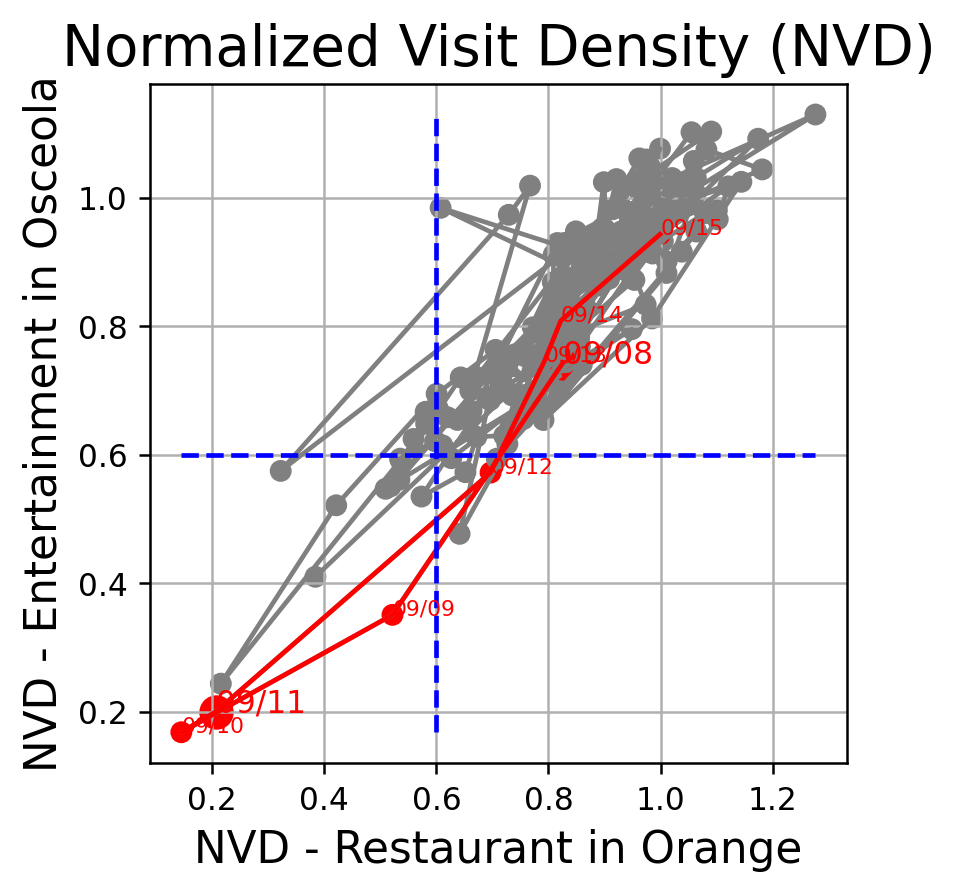

In [45]:
i='Orange'
i2='Osceola'
j='Rest'
j2='Entertainment'
fig, ax1 = plt.subplots()
fig.set_size_inches(4,4)
fig.set_dpi(225)
# color_list = ['C1','C0','C2','C3','C4','C5','C6']
k=0

base = datetime(2017,7,1)
numdays = len(df_2017[i+'_'+j])
datelist = pd.date_range(base,periods=numdays).strftime("%m/%d")    
xaxis = df_2017[i+'_'+j]
yaxis = df_2017[i2+'_'+j2]
zaxis = datelist
start_color = list(datelist).index('09/10')-2
end_color = list(datelist).index('09/13')+3
clist = ['grey' for i in range(len(datelist))]
for l in range(start_color,end_color):
    clist[l]='red'
plt.plot(xaxis,yaxis,c='grey')
plt.plot(xaxis[start_color:end_color],yaxis[start_color:end_color],c='red')
plt.scatter(xaxis,yaxis,c=clist)
for m in range(start_color, end_color):
    if m in [start_color,list(datelist).index('09/11'),end_color]:
        plt.text(xaxis[m],yaxis[m],datelist[m],fontsize=10,color=clist[m])
        plt.scatter(xaxis[m],yaxis[m],c=clist[m],s=100)
    else:
        plt.text(xaxis[m],yaxis[m],datelist[m],fontsize=7,color=clist[m])
# plt.plot(datelist,results.trend+results.resid)
# df_2017_corr_county[i]=results.trend+results.resid+results.seasonal
plt.vlines(0.6,min(yaxis),max(yaxis),colors='blue',linestyles='dashed')
plt.hlines(0.6,min(xaxis),max(xaxis),colors='blue',linestyles='dashed')
plt.title('Normalized Visit Density (NVD)',fontsize=18)
plt.grid(True)
# plt.xlim([min(xaxis),0.8])
# plt.ylim([min(yaxis),0.8])
plt.xlabel('NVD - {} in {}'.format('Restaurant',i),fontsize=14)
plt.ylabel('NVD - {} in {}'.format(j2,i2),fontsize=14)


Text(0, 0.5, 'NVD - Entertainment')

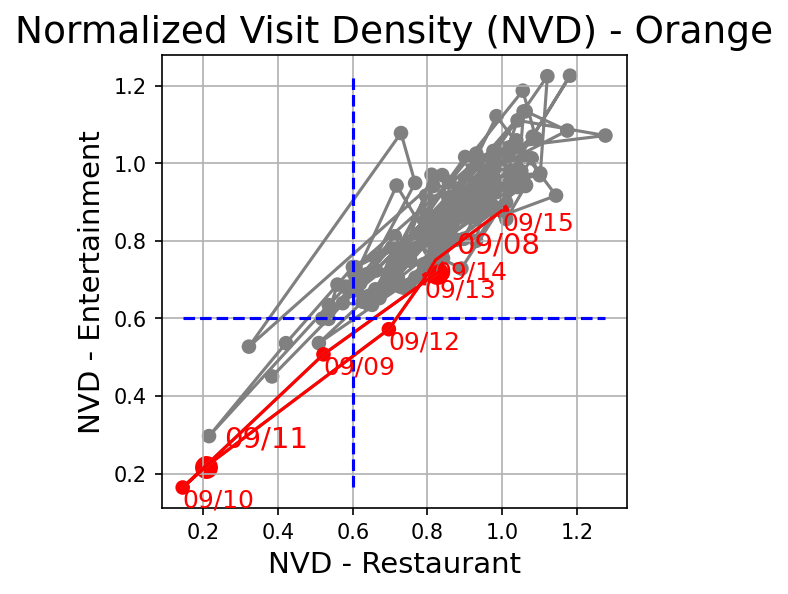

In [46]:
i=county_name[0]
j='Rest'
j2='Entertainment'
fig, ax1 = plt.subplots()
fig.set_size_inches(4,4)
fig.set_dpi(150)
# color_list = ['C1','C0','C2','C3','C4','C5','C6']
k=0

base = datetime(2017,7,1)
numdays = len(df_2017[i+'_'+j])
datelist = pd.date_range(base,periods=numdays).strftime("%m/%d")    
xaxis = df_2017[i+'_'+j]
yaxis = df_2017[i+'_'+j2]
zaxis = datelist
start_color = list(datelist).index('09/10')-2
end_color = list(datelist).index('09/13')+3
clist = ['grey' for i in range(len(datelist))]
for l in range(start_color,end_color):
    clist[l]='red'
plt.plot(xaxis,yaxis,c='grey')
plt.plot(xaxis[start_color:end_color],yaxis[start_color:end_color],c='red')
plt.scatter(xaxis,yaxis,c=clist)
for m in range(start_color, end_color):
    if m in [start_color,list(datelist).index('09/11'),end_color]:
        plt.text(xaxis[m]+0.05,yaxis[m]+0.05,datelist[m],fontsize=14,color=clist[m])
        plt.scatter(xaxis[m],yaxis[m],c=clist[m],s=100)
    else:
        plt.text(xaxis[m],yaxis[m]-0.05,datelist[m],fontsize=12,color=clist[m])
# plt.plot(datelist,results.trend+results.resid)
# df_2017_corr_county[i]=results.trend+results.resid+results.seasonal
plt.vlines(0.6,min(yaxis),max(yaxis),colors='blue',linestyles='dashed')
plt.hlines(0.6,min(xaxis),max(xaxis),colors='blue',linestyles='dashed')
plt.title('Normalized Visit Density (NVD) - '+i,fontsize=18)
plt.grid(True)
plt.xlabel('NVD - {}'.format('Restaurant'),fontsize=14)
plt.ylabel('NVD - {}'.format(j2),fontsize=14)


In [47]:
county_name

['Orange', 'Seminole', 'Polk', 'Osceola', 'Pasco', 'Lake', 'Brevard']

Text(0, 0.5, 'NVD - Polk')

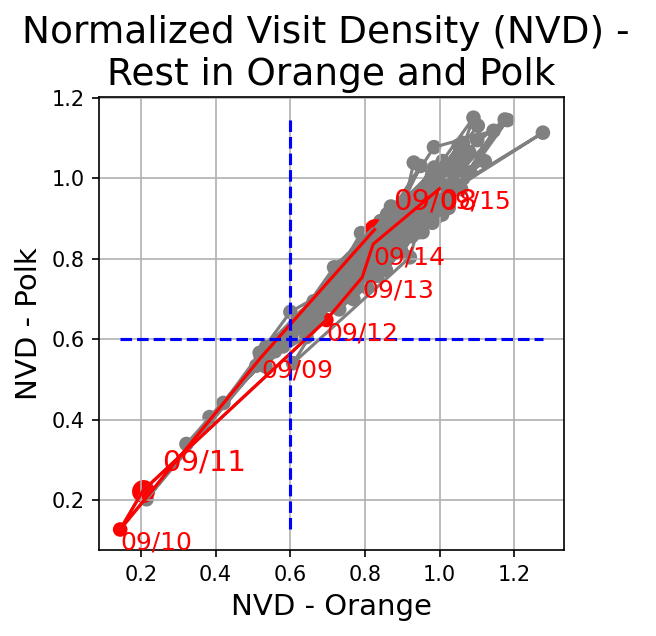

In [48]:
i1 = county_name[0]
i2 = county_name[2]
j='Rest'
j2='Rest'
fig, ax1 = plt.subplots()
fig.set_size_inches(4,4)
fig.set_dpi(150)
# color_list = ['C1','C0','C2','C3','C4','C5','C6']
k=0

base = datetime(2017,7,1)
numdays = len(df_2017[i+'_'+j])
datelist = pd.date_range(base,periods=numdays).strftime("%m/%d")    
xaxis = df_2017[i1+'_'+j]
yaxis = df_2017[i2+'_'+j2]
zaxis = datelist
start_color = list(datelist).index('09/10')-2
end_color = list(datelist).index('09/13')+3
clist = ['grey' for i in range(len(datelist))]
for l in range(start_color,end_color):
    clist[l]='red'
plt.plot(xaxis,yaxis,c='grey')
plt.plot(xaxis[start_color:end_color],yaxis[start_color:end_color],c='red')
plt.scatter(xaxis,yaxis,c=clist)
for m in range(start_color, end_color):
    if m in [start_color,list(datelist).index('09/11'),end_color]:
        plt.text(xaxis[m]+0.05,yaxis[m]+0.05,datelist[m],fontsize=14,color=clist[m])
        plt.scatter(xaxis[m],yaxis[m],c=clist[m],s=100)
    else:
        plt.text(xaxis[m],yaxis[m]-0.05,datelist[m],fontsize=12,color=clist[m])
# plt.plot(datelist,results.trend+results.resid)
# df_2017_corr_county[i]=results.trend+results.resid+results.seasonal
plt.vlines(0.6,min(yaxis),max(yaxis),colors='blue',linestyles='dashed')
plt.hlines(0.6,min(xaxis),max(xaxis),colors='blue',linestyles='dashed')
plt.title('''Normalized Visit Density (NVD) - 
'''+j+' in '+i1+' and '+i2,fontsize=18)
plt.grid(True)
plt.xlabel('NVD - {}'.format(i1),fontsize=14)
plt.ylabel('NVD - {}'.format(i2),fontsize=14)


Text(0, 0.5, 'NVD - Osceola')

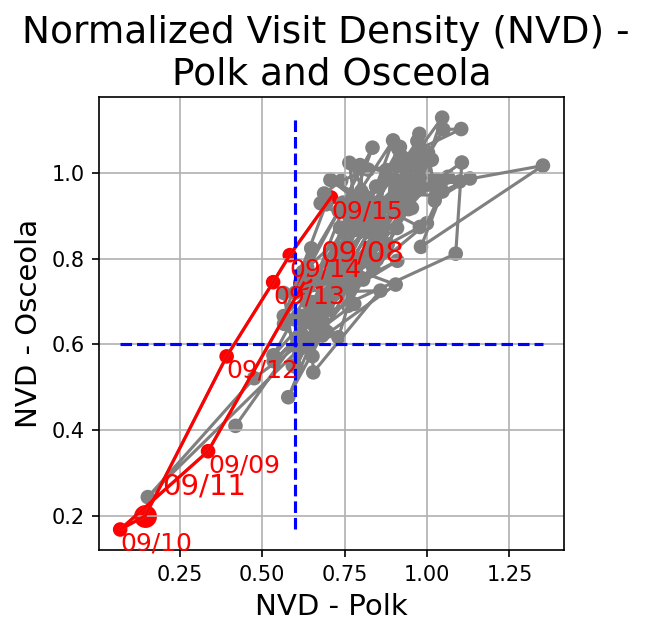

In [50]:
i1 = county_name[2]
i2 = county_name[3]
j='Entertainment'
j2='Entertainment'
fig, ax1 = plt.subplots()
fig.set_size_inches(4,4)
fig.set_dpi(150)
# color_list = ['C1','C0','C2','C3','C4','C5','C6']
k=0

base = datetime(2017,7,1)
numdays = len(df_2017[i+'_'+j])
datelist = pd.date_range(base,periods=numdays).strftime("%m/%d")    
xaxis = df_2017[i1+'_'+j]
yaxis = df_2017[i2+'_'+j2]
zaxis = datelist
start_color = list(datelist).index('09/10')-2
end_color = list(datelist).index('09/13')+3
clist = ['grey' for i in range(len(datelist))]
for l in range(start_color,end_color):
    clist[l]='red'
plt.plot(xaxis,yaxis,c='grey')
plt.plot(xaxis[start_color:end_color],yaxis[start_color:end_color],c='red')
plt.scatter(xaxis,yaxis,c=clist)
for m in range(start_color, end_color):
    if m in [start_color,list(datelist).index('09/11'),end_color]:
        plt.text(xaxis[m]+0.05,yaxis[m]+0.05,datelist[m],fontsize=14,color=clist[m])
        plt.scatter(xaxis[m],yaxis[m],c=clist[m],s=100)
    else:
        plt.text(xaxis[m],yaxis[m]-0.05,datelist[m],fontsize=12,color=clist[m])
# plt.plot(datelist,results.trend+results.resid)
# df_2017_corr_county[i]=results.trend+results.resid+results.seasonal
plt.vlines(0.6,min(yaxis),max(yaxis),colors='blue',linestyles='dashed')
plt.hlines(0.6,min(xaxis),max(xaxis),colors='blue',linestyles='dashed')
plt.title('''Normalized Visit Density (NVD) - 
'''+i1+' and '+i2,fontsize=18)
plt.grid(True)
plt.xlabel('NVD - {}'.format(i1),fontsize=14)
plt.ylabel('NVD - {}'.format(i2),fontsize=14)


## Data Visualization

In [65]:
df_Irma2.head()

Orange_Rest  Orange_Hospitals  Orange_Religion  Orange_Schools  \
07/01     0.953399          0.612750         0.696295        0.297692   
07/02     0.785547          0.522897         1.695412        0.395351   
07/04     0.607555          0.469820         0.398936        0.262713   
07/05     0.920390          1.084191         0.834579        0.494759   
07/06     0.965556          1.165592         0.749945        0.455468   

       Orange_Gasoline  Orange_Groceries  Orange_Colleges  Orange_Children  \
07/01         0.955512          1.077483         0.347339         0.650918   
07/02         0.824357          0.992201         0.344721         0.967862   
07/04         0.716236          0.803074         0.295703         0.520907   
07/05         1.131760          0.982202         0.950295         0.921798   
07/06         1.029685          0.967099         1.080085         1.066166   

       Orange_Entertainment  Orange_Construction  Seminole_Rest  \
07/01              1.007157             0.920296       1.006749   
07/02              0.821456             0.754643       0.819660   
07/04              0.732186             0.650049       0.634205   
07/05              0.998111             0.967088       0.855122   
07/06              0.992784             1.064230       0.931876   

       Seminole_Hospitals  Seminole_Religion  Seminole_Schools  \
07/01            0.562995           0.821124          0.159545   
07/02            0.500219           1.570805          0.261301   
07/04            0.417374           0.524527          0.145396   
07/05            1.057318           0.646711          0.230065   
07/06            1.112649           0.726028          0.293749   

       Seminole_Gasoline  Seminole_Groceries  Seminole_Colleges  \
07/01           0.819219            1.061004           0.242974   
07/02           0.686126            0.997296           0.244814   
07/04           0.659700            0.903138           0.199227   
07/05           0.926459            0.881597           0.896703   
07/06           0.991803            0.922387           0.988670   

       Seminole_Children  Seminole_Entertainment  Seminole_Construction  \
07/01           0.395031                0.842190               0.932947   
07/02           0.890726                0.747539               0.849899   
07/04           0.580374                0.791274               0.581521   
07/05           0.669180                0.853618               0.863607   
07/06           0.772560                0.933592               0.849346   

       Polk_Rest  Polk_Hospitals  Polk_Religion  Polk_Schools  Polk_Gasoline  \
07/01   0.953620        0.545272       0.674893      0.208834       0.956331   
07/02   0.733038        0.459136       1.403572      0.393522       0.794273   
07/04   0.540939        0.425140       0.560852      0.178736       0.712328   
07/05   0.804017        1.014027       0.833012      0.378710       0.932654   
07/06   0.952378        1.072363       0.854032      0.431432       0.973803   

       Polk_Groceries  Polk_Colleges  Polk_Children  Polk_Entertainment  \
07/01        1.091840       0.214181       0.658051            0.908915   
07/02        0.988263       0.080483       0.836904            0.672329   
07/04        0.905608       0.133220       0.452767            0.706707   
07/05        0.888639       0.428735       0.590512            0.856596   
07/06        0.959136       0.725116       0.743038            0.932508   

       Polk_Construction  Osceola_Rest  Osceola_Hospitals  Osceola_Religion  \
07/01           1.072385      1.009236           0.675853          0.705608   
07/02           0.783599      0.903930           0.539525          1.530146   
07/04           0.759470      0.674454           0.561590          0.525696   
07/05           0.879801      0.879526           1.105163          0.668314   
07/06           0.891531      0.982379           1.155823          0.771742   

       Osceola_Schools  Osceola_Gasoli

In [79]:
y_Orange = df_Irma2.loc[:,'Orange_Rest':'Orange_Construction'].mean(axis=1)
err_Orange = df_Irma2.loc[:,'Orange_Rest':'Orange_Construction'].std(axis=1)

### Box plot

{'whiskers': [<matplotlib.lines.Line2D at 0x7f31d35087c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f31d3508c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f31d35084f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f31d3514220>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f31d35144f0>],
 'means': []}

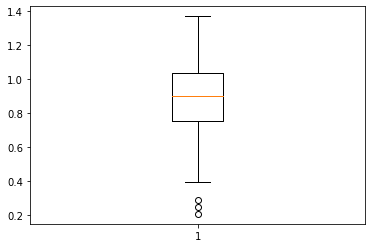

In [78]:
plt.boxplot(y_Orange)

### Error bar plot with standard deviation

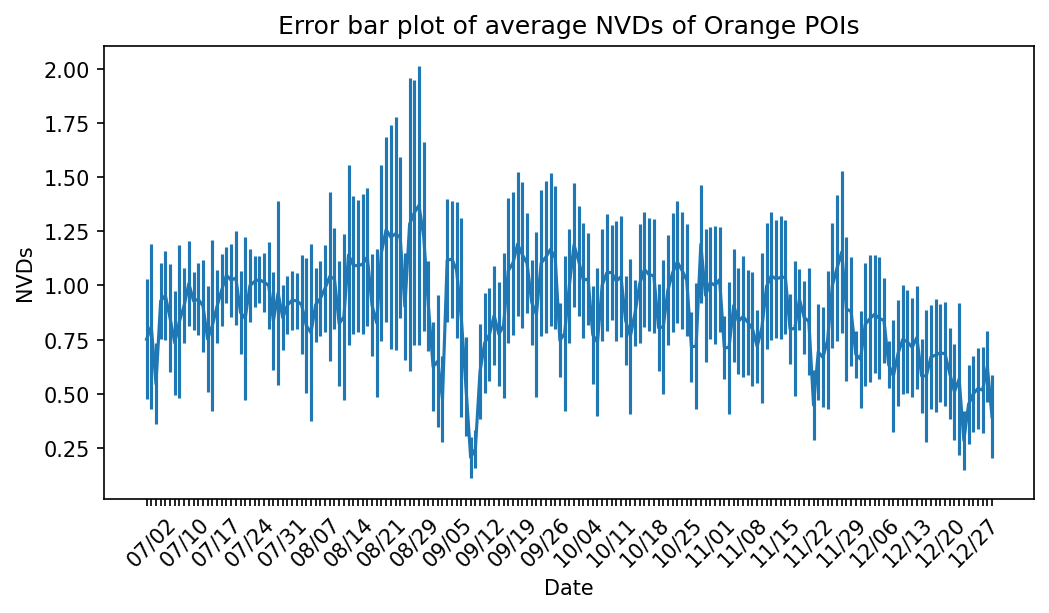

In [86]:
fig, ax1 = plt.subplots()
fig.set_size_inches(8,4)
fig.set_dpi(150)
plt.errorbar(x=df_Irma2.index,y=y_Orange,yerr=err_Orange)
plt.title('Error bar plot of average NVDs of Orange POIs')
plt.xlabel('Date')
plt.ylabel('NVDs')
plt.xticks(rotation=45)
for label in plt.xticks()[1]:
    if (int(k) % 7 == 0):
        label.set_visible(True)
    else:
        label.set_visible(False)
    k+=1


Orange_Rest  Orange_Hospitals  Orange_Religion  Orange_Schools  \
07/01     0.953399          0.612750         0.696295        0.297692   
07/02     0.785547          0.522897         1.695412        0.395351   
07/04     0.607555          0.469820         0.398936        0.262713   
07/05     0.920390          1.084191         0.834579        0.494759   
07/06     0.965556          1.165592         0.749945        0.455468   

       Orange_Gasoline  Orange_Groceries  Orange_Colleges  Orange_Children  \
07/01         0.955512          1.077483         0.347339         0.650918   
07/02         0.824357          0.992201         0.344721         0.967862   
07/04         0.716236          0.803074         0.295703         0.520907   
07/05         1.131760          0.982202         0.950295         0.921798   
07/06         1.029685          0.967099         1.080085         1.066166   

       Orange_Entertainment  Orange_Construction  Seminole_Rest  \
07/01              1.007157             0.920296       1.006749   
07/02              0.821456             0.754643       0.819660   
07/04              0.732186             0.650049       0.634205   
07/05              0.998111             0.967088       0.855122   
07/06              0.992784             1.064230       0.931876   

       Seminole_Hospitals  Seminole_Religion  Seminole_Schools  \
07/01            0.562995           0.821124          0.159545   
07/02            0.500219           1.570805          0.261301   
07/04            0.417374           0.524527          0.145396   
07/05            1.057318           0.646711          0.230065   
07/06            1.112649           0.726028          0.293749   

       Seminole_Gasoline  Seminole_Groceries  Seminole_Colleges  \
07/01           0.819219            1.061004           0.242974   
07/02           0.686126            0.997296           0.244814   
07/04           0.659700            0.903138           0.199227   
07/05           0.926459            0.881597           0.896703   
07/06           0.991803            0.922387           0.988670   

       Seminole_Children  Seminole_Entertainment  Seminole_Construction  \
07/01           0.395031                0.842190               0.932947   
07/02           0.890726                0.747539               0.849899   
07/04           0.580374                0.791274               0.581521   
07/05           0.669180                0.853618               0.863607   
07/06           0.772560                0.933592               0.849346   

       Polk_Rest  Polk_Hospitals  Polk_Religion  Polk_Schools  Polk_Gasoline  \
07/01   0.953620        0.545272       0.674893      0.208834       0.956331   
07/02   0.733038        0.459136       1.403572      0.393522       0.794273   
07/04   0.540939        0.425140       0.560852      0.178736       0.712328   
07/05   0.804017        1.014027       0.833012      0.378710       0.932654   
07/06   0.952378        1.072363       0.854032      0.431432       0.973803   

       Polk_Groceries  Polk_Colleges  Polk_Children  Polk_Entertainment  \
07/01        1.091840       0.214181       0.658051            0.908915   
07/02        0.988263       0.080483       0.836904            0.672329   
07/04        0.905608       0.133220       0.452767            0.706707   
07/05        0.888639       0.428735       0.590512            0.856596   
07/06        0.959136       0.725116       0.743038            0.932508   

       Polk_Construction  Osceola_Rest  Osceola_Hospitals  Osceola_Religion  \
07/01           1.072385      1.009236           0.675853          0.705608   
07/02           0.783599      0.903930           0.539525          1.530146   
07/04           0.759470      0.674454           0.561590          0.525696   
07/05           0.879801      0.879526           1.105163          0.668314   
07/06           0.891531      0.982379           1.155823          0.771742   

       Osceola_Schools  Osceola_Gasoli

## Data Split

In [15]:
data_1 = df_Irma2.loc[index_list[0:70],col_df_Irma2].copy()

In [16]:
data_2 = df_Irma2.loc[index_list[70:89],col_df_Irma2].copy()

In [17]:
data_3 = df_Irma2.loc[index_list[89::],col_df_Irma2].copy()

In [18]:
data_4 = df_Irma2.loc[index_list[70::],col_df_Irma2].copy()

In [19]:
#ARD: Bayesian ARD regression
import networkx as nx
from cdt.independence.graph import Glasso, ARD
from cdt.causality.graph import GES, GIES, CAM, PC, SAM
from matplotlib.pyplot import figure

In [33]:
obj_Glasso = Glasso()
output_Glasso = obj_Glasso.predict(data)

graphical_lasso: did not converge after 2000 iteration: dual gap: 9.535e-02


In [34]:
output_aracne_Glasso = cdt.utils.graph.remove_indirect_links(output_Glasso,alg='aracne')

adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


In [35]:
obj_GES = GES()
output_GES_aracne_ARD = obj_GES.predict(data,output_aracne_Glasso)

GES is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


In [38]:
pos_Orange = nx.circular_layout([i for i in list(output_GES_aracne_ARD.nodes) if 'Orange' in i],center=[9.5,3.5])
pos_Seminole = nx.circular_layout([i for i in list(output_GES_aracne_ARD.nodes) if 'Seminole' in i],center=[10,6])
pos_Polk = nx.circular_layout([i for i in list(output_GES_aracne_ARD.nodes) if 'Polk' in i],center=[6,1])
pos_Osceola = nx.circular_layout([i for i in list(output_GES_aracne_ARD.nodes) if 'Osceola' in i],center=[11,1])
pos_Pasco = nx.circular_layout([i for i in list(output_GES_aracne_ARD.nodes) if 'Pasco' in i],center=[2,3])
pos_Lake = nx.circular_layout([i for i in list(output_GES_aracne_ARD.nodes) if 'Lake' in i],center=[6,4])
pos_Brevard = nx.circular_layout([i for i in list(output_GES_aracne_ARD.nodes) if 'Brevard' in i],center=[13,-2])
pos_geom = {**pos_Orange,**pos_Seminole,**pos_Polk,**pos_Osceola,**pos_Pasco,**pos_Lake,**pos_Brevard}

In [39]:
output_GES_aracne_ARD.nodes

NodeView(('Orange_Rest', 'Orange_Hospitals', 'Orange_Religion', 'Orange_Schools', 'Orange_Gasoline', 'Orange_Groceries', 'Orange_Colleges', 'Orange_Children', 'Orange_Entertainment', 'Orange_Construction', 'Seminole_Rest', 'Seminole_Hospitals', 'Seminole_Religion', 'Seminole_Schools', 'Seminole_Gasoline', 'Seminole_Groceries', 'Seminole_Colleges', 'Seminole_Children', 'Seminole_Entertainment', 'Seminole_Construction', 'Polk_Rest', 'Polk_Hospitals', 'Polk_Religion', 'Polk_Schools', 'Polk_Gasoline', 'Polk_Groceries', 'Polk_Colleges', 'Polk_Children', 'Polk_Entertainment', 'Polk_Construction', 'Osceola_Rest', 'Osceola_Hospitals', 'Osceola_Religion', 'Osceola_Schools', 'Osceola_Gasoline', 'Osceola_Groceries', 'Osceola_Colleges', 'Osceola_Children', 'Osceola_Entertainment', 'Osceola_Construction', 'Pasco_Rest', 'Pasco_Hospitals', 'Pasco_Religion', 'Pasco_Schools', 'Pasco_Gasoline', 'Pasco_Groceries', 'Pasco_Colleges', 'Pasco_Children', 'Pasco_Entertainment', 'Pasco_Construction', 'Lake_Rest

In [41]:
nodelist = list(output_GES_aracne_ARD)

In [42]:
edgelist = list(output_GES_aracne_ARD.edges)

In [44]:
nodelist = nodelist[0:10]+['Brightness_Orange_Rest']

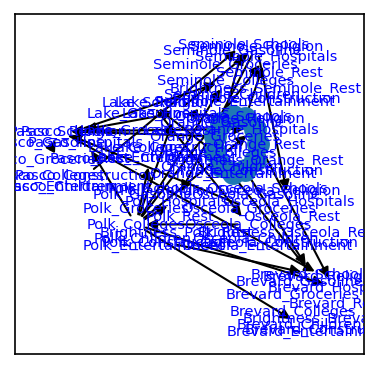

In [46]:
figure(figsize=(3, 3), dpi=150)
# nx.draw_networkx(output_GES_aracne_ARD,pos_geom,font_size=7,node_size=100, font_color='b',edgelist=list(),nodelist=nodelist)
nx.draw_networkx(output_GES_aracne_ARD,pos_geom,font_size=7,node_size=100, font_color='b',edgelist=edgelist,nodelist=nodelist)
plt.show()

## 1. Load Data

In [20]:
import cdt
import networkx as nx

In [21]:
cdt.SETTINGS.NJOBS=1
cdt.SETTINGS.verbose=False

print(cdt.SETTINGS.GPU)
print(cdt.SETTINGS.NJOBS)


1
1


## Scenario setup

### 6. SAM

## Testing Scenarios

In [22]:
#ARD: Bayesian ARD regression
import networkx as nx
from cdt.independence.graph import Glasso, ARD
from cdt.causality.graph import GES, GIES, CAM, PC, SAM
from matplotlib.pyplot import figure

### 6. SAM

In [23]:
import gc

In [24]:
obj_SAM = SAM(nruns=12)
output_SAM = obj_SAM.predict(data)

100%|███████████████████████████████| 4000/4000 [01:45<00:00, 38.02it/s, disc=1.45, gen=-.56, regul_loss=8.9, tot=-31.5]


## Sensitivity analysis on lambda1 and lambda2

In [61]:
for lambda1 in np.arange(1,10+1,1):
    for lambda2 in np.arange(0.001,(0.02+0.0019),(0.02-0.001)/10):
        print([lambda1,lambda2])
        print('\n')
        obj_SAM = SAM(nruns=12,lambda1=lambda1,lambda2=lambda2)
        output_SAM = obj_SAM.predict(data)
        with open('/mnt/d/POIdata/Irma/SAM_full_{:.4f}_{:.4f}.pkl'.format(lambda1,lambda2), 'wb') as f:
            pickle.dump([obj_SAM,output_SAM], f)
        

100%|████████████████████████████| 4000/4000 [01:44<00:00, 38.45it/s, disc=-.169, gen=-1.01, regul_loss=7.96, tot=-66.3]


In [47]:
import pickle
with open('/mnt/d/POIdata/Irma/SAM_full.pkl', 'wb') as f:
    pickle.dump([obj_SAM,output_SAM], f)

array([0.001 , 0.0029, 0.0048, 0.0067, 0.0086, 0.0105, 0.0124, 0.0143,
       0.0162, 0.0181, 0.02  ])

In [25]:
edge_weight = [output_SAM.edges[[i for i in output_SAM.edges][j]]['weight'] for j in range(len(output_SAM.edges))]

(array([5179.,  132.,   69.,   53.,   25.,   25.,   19.,   20.,   19.,
           9.]),
 array([1.15536066e-04, 9.96995471e-02, 1.99283558e-01, 2.98867569e-01,
        3.98451580e-01, 4.98035591e-01, 5.97619602e-01, 6.97203613e-01,
        7.96787624e-01, 8.96371635e-01, 9.95955646e-01]),
 <BarContainer object of 10 artists>)

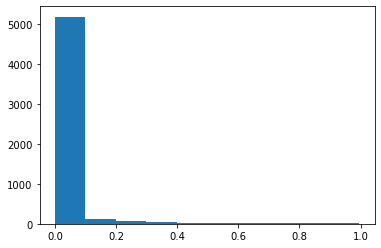

In [28]:
plt.hist(edge_weight)

In [34]:
edge_eff_tf = [i>=0.6 for i in edge_weight]


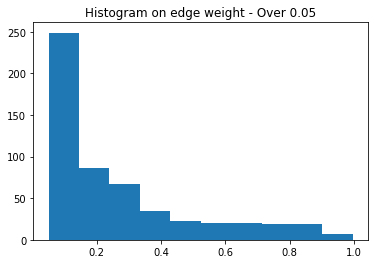

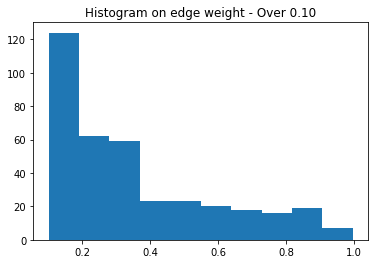

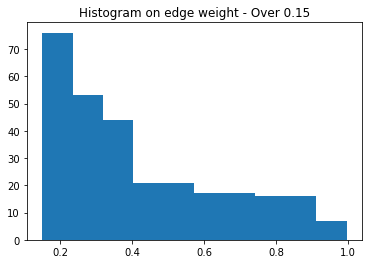

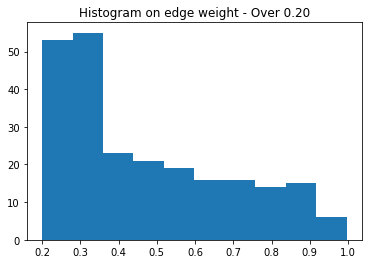

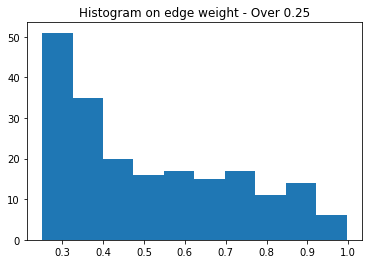

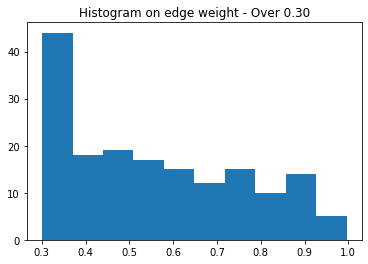

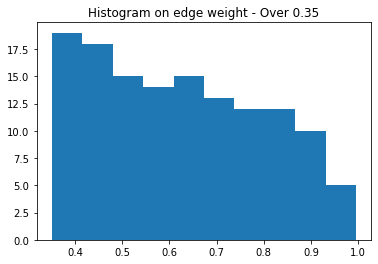

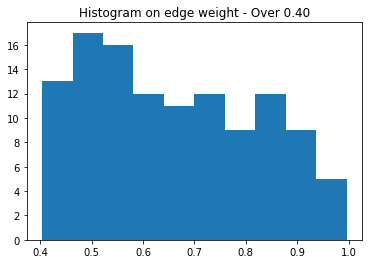

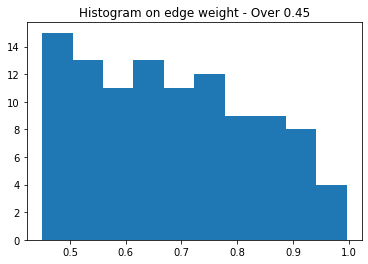

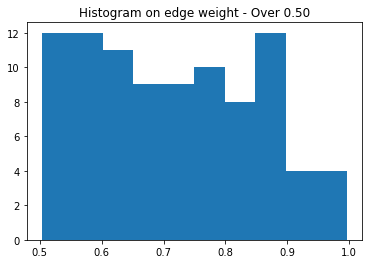

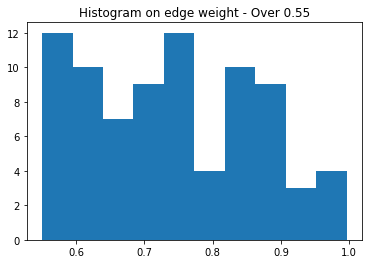

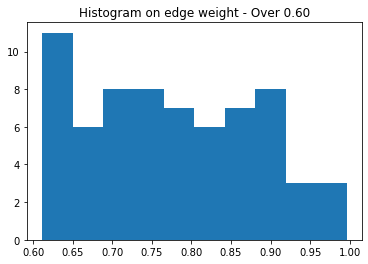

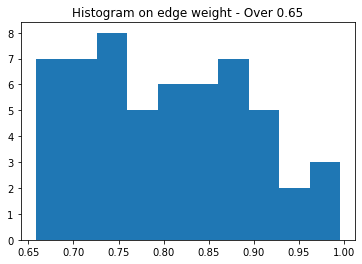

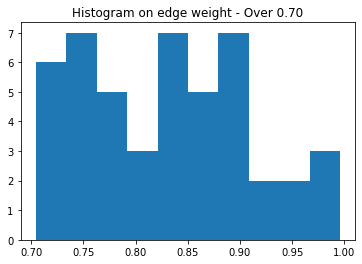

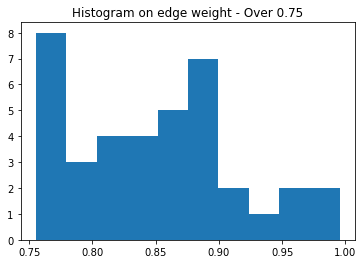

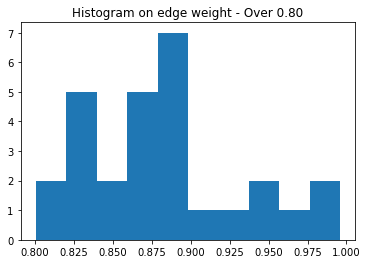

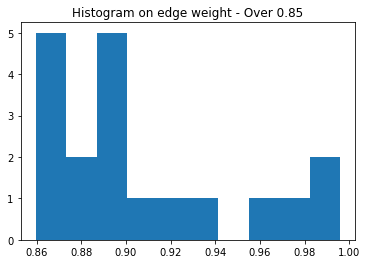

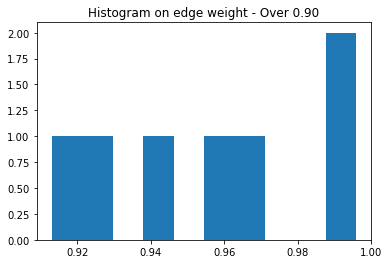

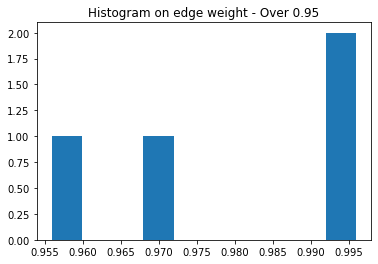

In [42]:
dict_edge_weight=dict()
for thrs in np.arange(0.05,1,0.05):
    edge_weight_eff = [i for i in edge_weight if i>=thrs]
    dict_edge_weight['{:.2f}'.format(thrs)]=edge_weight_eff
    plt.hist(edge_weight_eff)
    plt.title('Histogram on edge weight - Over {:.2f}'.format(thrs))
    plt.show()

In [45]:
pd.cut(edge_weight,bins=np.arange(0.05,1,0.05)).value_counts()

(0.05, 0.1]    174
(0.1, 0.15]     83
(0.15, 0.2]     50
(0.2, 0.25]     36
(0.25, 0.3]     33
(0.3, 0.35]     36
(0.35, 0.4]     17
(0.4, 0.45]     11
(0.45, 0.5]     14
(0.5, 0.55]     11
(0.55, 0.6]     13
(0.6, 0.65]     11
(0.65, 0.7]      9
(0.7, 0.75]      9
(0.75, 0.8]     10
(0.8, 0.85]      9
(0.85, 0.9]     12
(0.9, 0.95]      3
dtype: int64

63

In [48]:
from itertools import compress
edge_eff = list(compress(list(output_SAM.edges),edge_eff_tf))

In [49]:
output_SAM_real = output_SAM.edge_subgraph(edge_eff)

In [50]:
pos_Orange = nx.circular_layout([i for i in list(output_SAM_real.nodes) if 'Orange' in i],center=[9.5,3.5])
pos_Seminole = nx.circular_layout([i for i in list(output_SAM_real.nodes) if 'Seminole' in i],center=[10,6])
pos_Polk = nx.circular_layout([i for i in list(output_SAM_real.nodes) if 'Polk' in i],center=[6,1])
pos_Osceola = nx.circular_layout([i for i in list(output_SAM_real.nodes) if 'Osceola' in i],center=[11,1])
pos_Pasco = nx.circular_layout([i for i in list(output_SAM_real.nodes) if 'Pasco' in i],center=[2,3])
pos_Lake = nx.circular_layout([i for i in list(output_SAM_real.nodes) if 'Lake' in i],center=[6,4])
pos_Brevard = nx.circular_layout([i for i in list(output_SAM_real.nodes) if 'Brevard' in i],center=[13,-2])
pos_geom = {**pos_Orange,**pos_Seminole,**pos_Polk,**pos_Osceola,**pos_Pasco,**pos_Lake,**pos_Brevard}

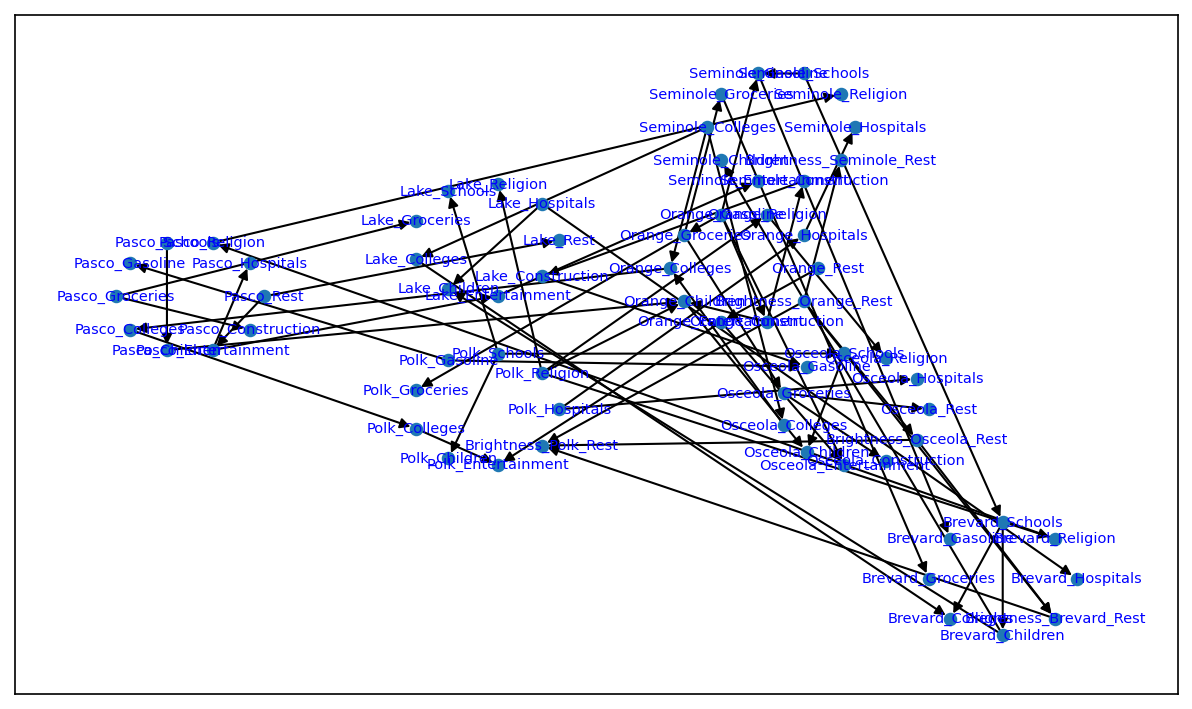

In [51]:
figure(figsize=(10, 6), dpi=150)
nx.draw_networkx(output_SAM_real,pos_geom,font_size=7,node_size=30, font_color='b')
plt.show()

### data_1

In [27]:
obj_SAM_1 = SAM(nruns=12)
output_SAM_1 = obj_SAM_1.predict(data_1)

100%|██████████████████████████████| 4000/4000 [01:16<00:00, 52.52it/s, disc=-.129, gen=-1.01, regul_loss=15.3, tot=-59]


In [36]:
pos_Orange = nx.circular_layout([i for i in list(output_SAM_real_1.nodes) if 'Orange' in i],center=[9.5,3.5])
pos_Seminole = nx.circular_layout([i for i in list(output_SAM_real_1.nodes) if 'Seminole' in i],center=[10,6])
pos_Polk = nx.circular_layout([i for i in list(output_SAM_real_1.nodes) if 'Polk' in i],center=[6,1])
pos_Osceola = nx.circular_layout([i for i in list(output_SAM_real_1.nodes) if 'Osceola' in i],center=[11,1])
pos_Pasco = nx.circular_layout([i for i in list(output_SAM_real_1.nodes) if 'Pasco' in i],center=[2,3])
pos_Lake = nx.circular_layout([i for i in list(output_SAM_real_1.nodes) if 'Lake' in i],center=[6,4])
pos_Brevard = nx.circular_layout([i for i in list(output_SAM_real_1.nodes) if 'Brevard' in i],center=[13,-2])
pos_geom = {**pos_Orange,**pos_Seminole,**pos_Polk,**pos_Osceola,**pos_Pasco,**pos_Lake,**pos_Brevard}

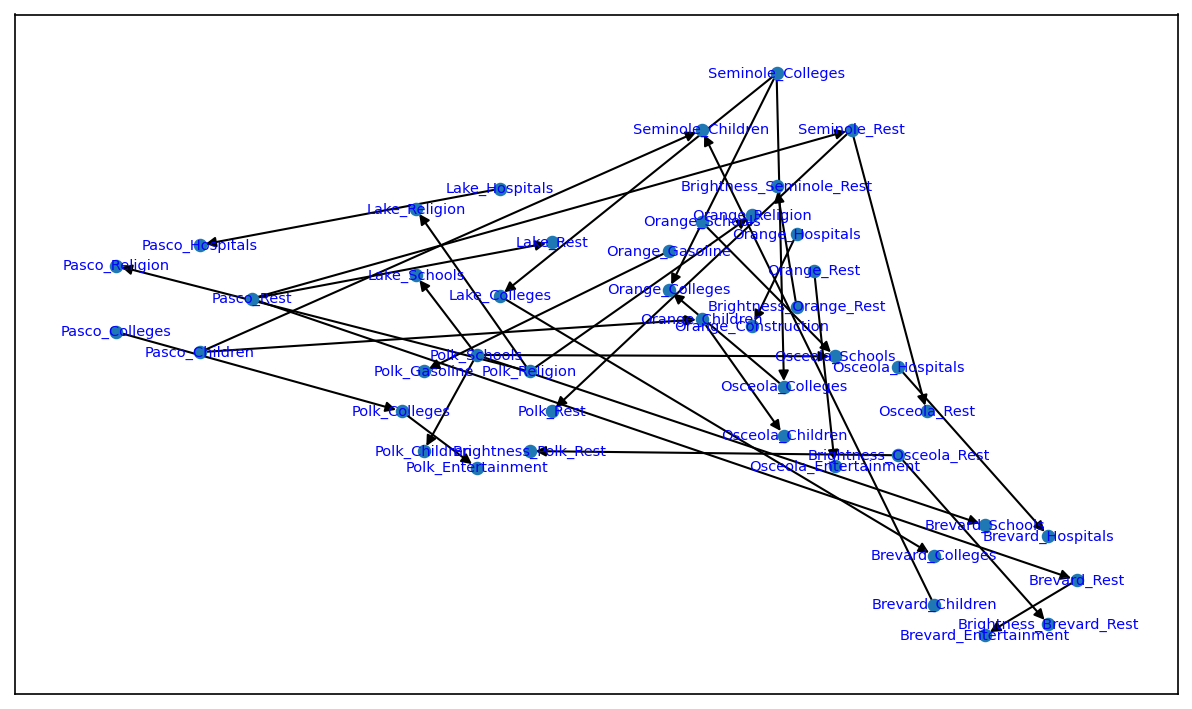

In [37]:
edge_weight_1 = [output_SAM_1.edges[[i for i in output_SAM_1.edges][j]]['weight'] for j in range(len(output_SAM_1.edges))]
edge_eff_tf_1 = [i>=0.6 for i in edge_weight_1]
from itertools import compress
edge_eff_1 = list(compress(list(output_SAM_1.edges),edge_eff_tf_1))
output_SAM_real_1 = output_SAM_1.edge_subgraph(edge_eff_1)
figure(figsize=(10, 6), dpi=150)
nx.draw_networkx(output_SAM_real_1,pos_geom,font_size=7,node_size=30, font_color='b')
plt.show()

In [54]:
output_SAM_1

In [60]:
nx.write_gexf(output_SAM_1, "/mnt/d/POIdata/graphs/SAM_1.gexf")

### data_2

In [31]:
obj_SAM_2 = SAM(nruns=12)
output_SAM_2 = obj_SAM_2.predict(data_2)

100%|████████████████████████████| 4000/4000 [01:15<00:00, 52.91it/s, disc=-2.17, gen=-1.06, regul_loss=38.4, tot=-40.3]


In [40]:
pos_Orange = nx.circular_layout([i for i in list(output_SAM_real_2.nodes) if 'Orange' in i],center=[9.5,3.5])
pos_Seminole = nx.circular_layout([i for i in list(output_SAM_real_2.nodes) if 'Seminole' in i],center=[10,6])
pos_Polk = nx.circular_layout([i for i in list(output_SAM_real_2.nodes) if 'Polk' in i],center=[6,1])
pos_Osceola = nx.circular_layout([i for i in list(output_SAM_real_2.nodes) if 'Osceola' in i],center=[11,1])
pos_Pasco = nx.circular_layout([i for i in list(output_SAM_real_2.nodes) if 'Pasco' in i],center=[2,3])
pos_Lake = nx.circular_layout([i for i in list(output_SAM_real_2.nodes) if 'Lake' in i],center=[6,4])
pos_Brevard = nx.circular_layout([i for i in list(output_SAM_real_2.nodes) if 'Brevard' in i],center=[13,-2])
pos_geom_2 = {**pos_Orange,**pos_Seminole,**pos_Polk,**pos_Osceola,**pos_Pasco,**pos_Lake,**pos_Brevard}

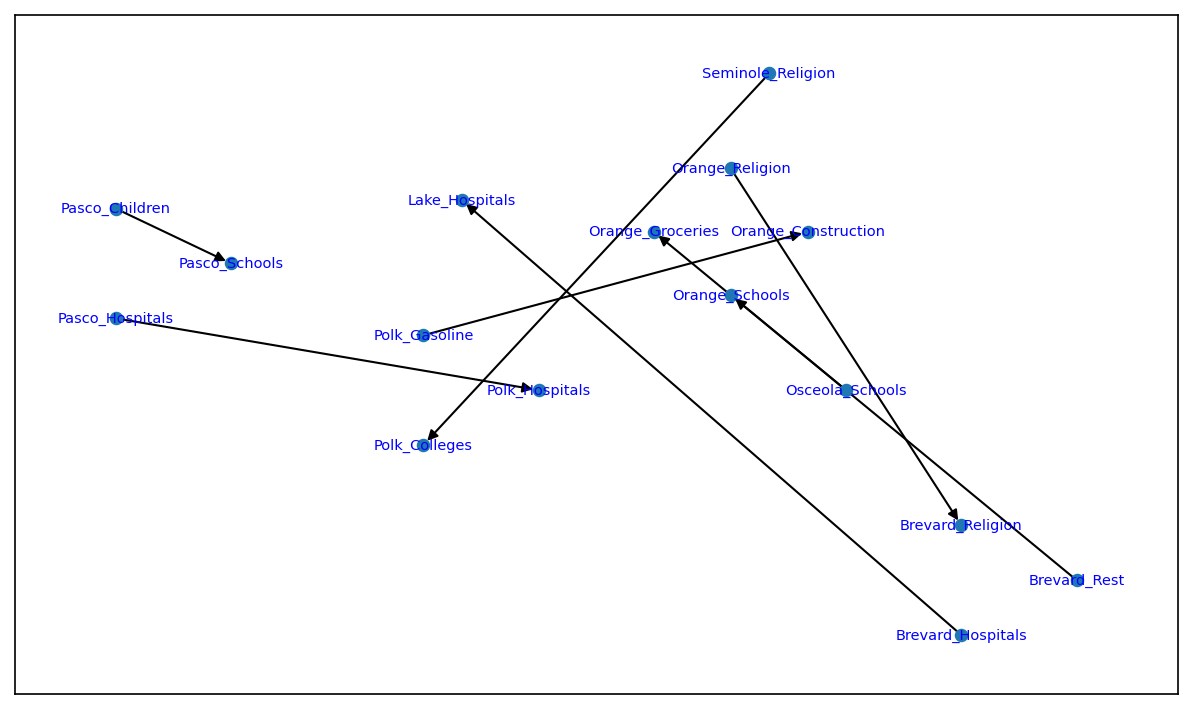

In [69]:
edge_weight_2 = [output_SAM_2.edges[[i for i in output_SAM_2.edges][j]]['weight'] for j in range(len(output_SAM_2.edges))]
edge_eff_tf_2 = [i>=0.6 for i in edge_weight_2]
from itertools import compress
edge_eff_2 = list(compress(list(output_SAM_2.edges),edge_eff_tf_2))
output_SAM_real_2 = output_SAM_2.edge_subgraph(edge_eff_2)
figure(figsize=(10, 6), dpi=150)
nx.draw_networkx(output_SAM_real_2,pos_geom_2,font_size=7,node_size=30, font_color='b')
plt.show()

In [59]:
nx.write_gexf(output_SAM_2, "/mnt/d/POIdata/graphs/SAM_2.gexf")

### data_3

In [42]:
obj_SAM_3 = SAM(nruns=12)
output_SAM_3 = obj_SAM_3.predict(data_3)

Process Process-78:
Traceback (most recent call last):
  File "/home/sangung/anaconda3/envs/pytorch_env_r/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/sangung/anaconda3/envs/pytorch_env_r/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
Process Process-77:


KeyboardInterrupt: 

Process Process-74:
Process Process-73:
Process Process-76:
Traceback (most recent call last):
  File "/home/sangung/anaconda3/envs/pytorch_env_r/lib/python3.8/site-packages/cdt/utils/parallel.py", line 53, in worker_subprocess
    sleep(1)
Traceback (most recent call last):
Process Process-75:
Traceback (most recent call last):
KeyboardInterrupt
  File "/home/sangung/anaconda3/envs/pytorch_env_r/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
Process Process-70:
  File "/home/sangung/anaconda3/envs/pytorch_env_r/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/sangung/anaconda3/envs/pytorch_env_r/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
Process Process-71:
  File "/home/sangung/anaconda3/envs/pytorch_env_r/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/sangun

In [44]:
pos_Orange = nx.circular_layout([i for i in list(output_SAM_real_3.nodes) if 'Orange' in i],center=[9.5,3.5])
pos_Seminole = nx.circular_layout([i for i in list(output_SAM_real_3.nodes) if 'Seminole' in i],center=[10,6])
pos_Polk = nx.circular_layout([i for i in list(output_SAM_real_3.nodes) if 'Polk' in i],center=[6,1])
pos_Osceola = nx.circular_layout([i for i in list(output_SAM_real_3.nodes) if 'Osceola' in i],center=[11,1])
pos_Pasco = nx.circular_layout([i for i in list(output_SAM_real_3.nodes) if 'Pasco' in i],center=[2,3])
pos_Lake = nx.circular_layout([i for i in list(output_SAM_real_3.nodes) if 'Lake' in i],center=[6,4])
pos_Brevard = nx.circular_layout([i for i in list(output_SAM_real_3.nodes) if 'Brevard' in i],center=[13,-2])
pos_geom_3 = {**pos_Orange,**pos_Seminole,**pos_Polk,**pos_Osceola,**pos_Pasco,**pos_Lake,**pos_Brevard}

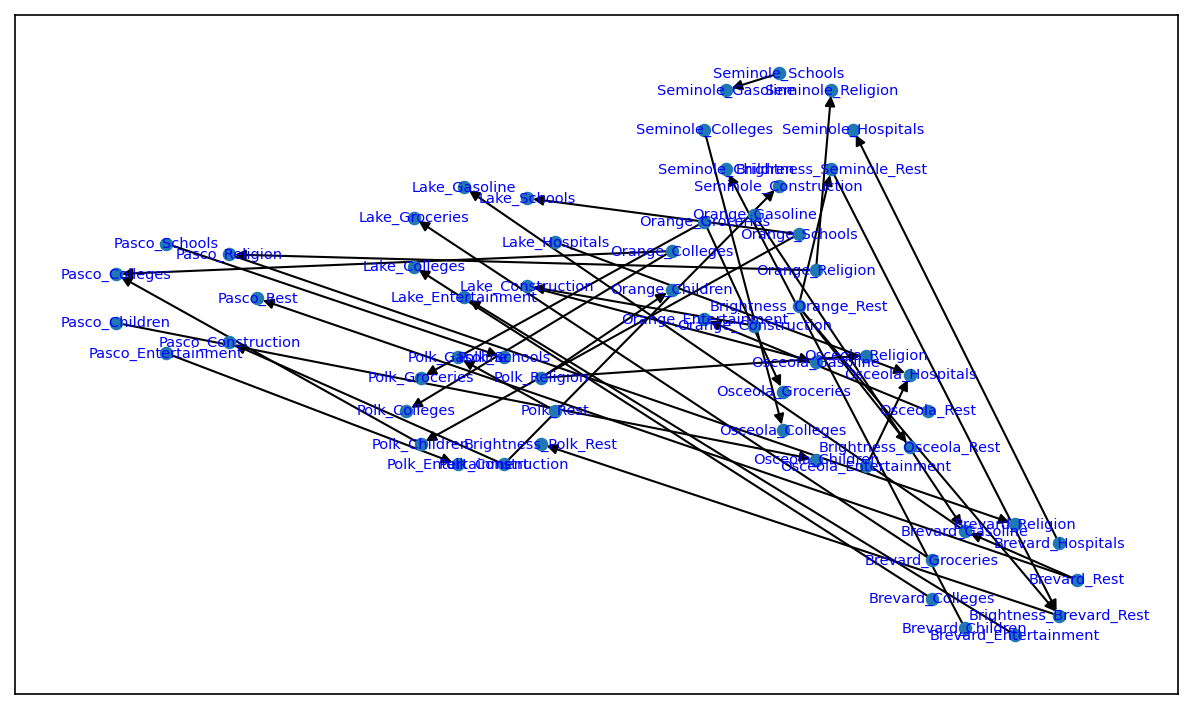

In [45]:
edge_weight_3 = [output_SAM_3.edges[[i for i in output_SAM_3.edges][j]]['weight'] for j in range(len(output_SAM_3.edges))]
edge_eff_tf_3 = [i>=0.6 for i in edge_weight_3]
from itertools import compress
edge_eff_3 = list(compress(list(output_SAM_3.edges),edge_eff_tf_3))
output_SAM_real_3 = output_SAM_3.edge_subgraph(edge_eff_3)
figure(figsize=(10, 6), dpi=150)
nx.draw_networkx(output_SAM_real_3,pos_geom_3,font_size=7,node_size=30, font_color='b')
plt.show()

In [58]:
nx.write_gexf(output_SAM_3, "/mnt/d/POIdata/graphs/SAM_3.gexf")

### data_4

In [34]:
obj_SAM_4 = SAM(nruns=12)
output_SAM_4 = obj_SAM_4.predict(data_4)

100%|██████████████████████████████| 4000/4000 [01:32<00:00, 43.33it/s, disc=-.46, gen=-.98, regul_loss=11.6, tot=-60.8]


In [46]:
pos_Orange = nx.circular_layout([i for i in list(output_SAM_real_4.nodes) if 'Orange' in i],center=[9.5,3.5])
pos_Seminole = nx.circular_layout([i for i in list(output_SAM_real_4.nodes) if 'Seminole' in i],center=[10,6])
pos_Polk = nx.circular_layout([i for i in list(output_SAM_real_4.nodes) if 'Polk' in i],center=[6,1])
pos_Osceola = nx.circular_layout([i for i in list(output_SAM_real_4.nodes) if 'Osceola' in i],center=[11,1])
pos_Pasco = nx.circular_layout([i for i in list(output_SAM_real_4.nodes) if 'Pasco' in i],center=[2,3])
pos_Lake = nx.circular_layout([i for i in list(output_SAM_real_4.nodes) if 'Lake' in i],center=[6,4])
pos_Brevard = nx.circular_layout([i for i in list(output_SAM_real_4.nodes) if 'Brevard' in i],center=[13,-2])
pos_geom_4 = {**pos_Orange,**pos_Seminole,**pos_Polk,**pos_Osceola,**pos_Pasco,**pos_Lake,**pos_Brevard}

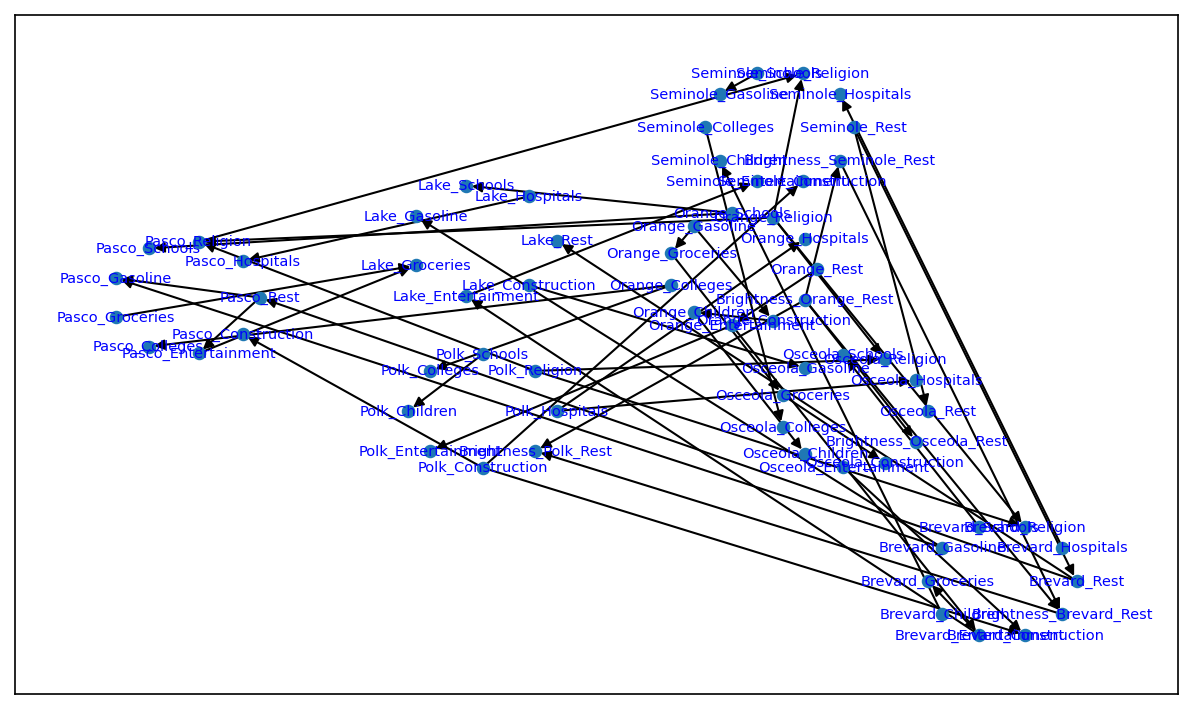

In [48]:
edge_weight_4 = [output_SAM_4.edges[[i for i in output_SAM_4.edges][j]]['weight'] for j in range(len(output_SAM_4.edges))]
edge_eff_tf_4 = [i>=0.6 for i in edge_weight_4]
from itertools import compress
edge_eff_4 = list(compress(list(output_SAM_4.edges),edge_eff_tf_4))
output_SAM_real_4 = output_SAM_4.edge_subgraph(edge_eff_4)
figure(figsize=(10, 6), dpi=150)
nx.draw_networkx(output_SAM_real_4,pos_geom_4,font_size=7,node_size=30, font_color='b')
plt.show()

In [61]:
nx.write_gexf(output_SAM_4, "/mnt/d/POIdata/graphs/SAM_4.gexf")

In [52]:
list(output_SAM_real_1.edges)

[('Orange_Rest', 'Osceola_Entertainment'),
 ('Orange_Hospitals', 'Orange_Construction'),
 ('Orange_Schools', 'Osceola_Schools'),
 ('Orange_Gasoline', 'Polk_Gasoline'),
 ('Orange_Children', 'Osceola_Children'),
 ('Seminole_Rest', 'Polk_Rest'),
 ('Seminole_Rest', 'Osceola_Rest'),
 ('Seminole_Colleges', 'Orange_Colleges'),
 ('Seminole_Colleges', 'Osceola_Colleges'),
 ('Seminole_Colleges', 'Lake_Colleges'),
 ('Polk_Religion', 'Orange_Religion'),
 ('Polk_Religion', 'Pasco_Religion'),
 ('Polk_Religion', 'Lake_Religion'),
 ('Polk_Schools', 'Polk_Children'),
 ('Polk_Schools', 'Osceola_Schools'),
 ('Polk_Schools', 'Lake_Schools'),
 ('Polk_Schools', 'Brevard_Schools'),
 ('Polk_Colleges', 'Polk_Entertainment'),
 ('Osceola_Hospitals', 'Brevard_Hospitals'),
 ('Osceola_Colleges', 'Orange_Colleges'),
 ('Pasco_Rest', 'Seminole_Rest'),
 ('Pasco_Rest', 'Lake_Rest'),
 ('Pasco_Rest', 'Brevard_Rest'),
 ('Pasco_Colleges', 'Polk_Colleges'),
 ('Pasco_Children', 'Orange_Children'),
 ('Pasco_Children', 'Seminol

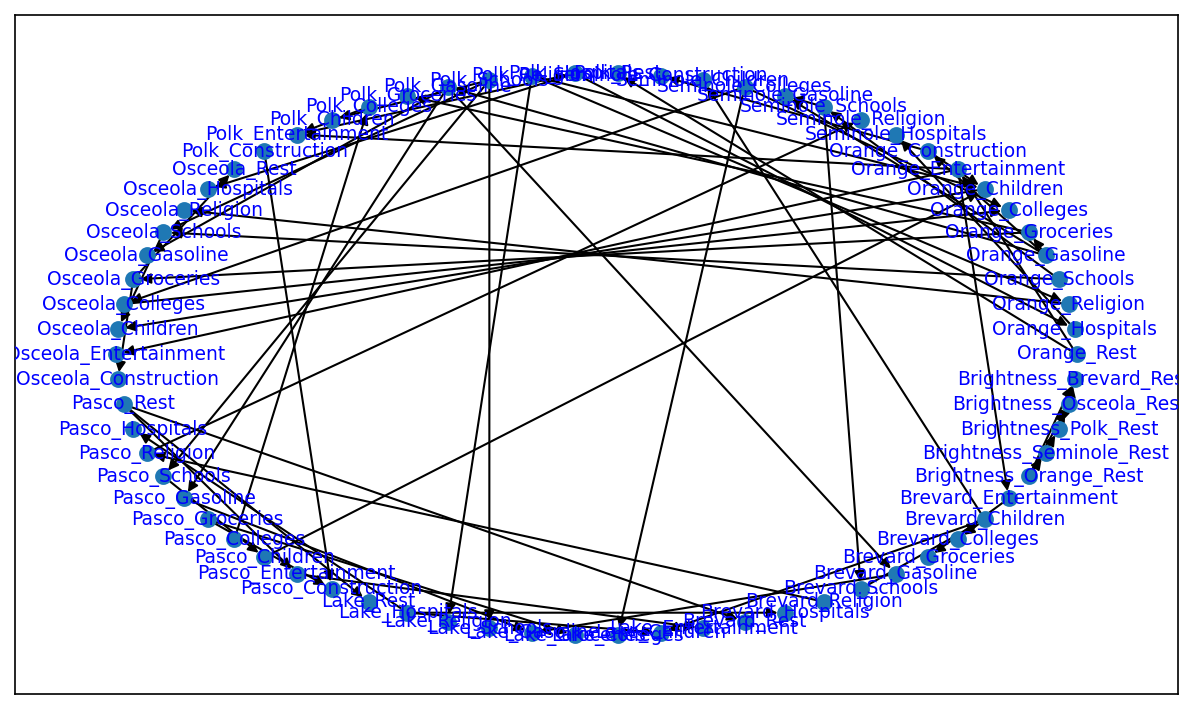

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.88168699]
 [0.         0.         0.         ... 0.77210546 0.         0.        ]]


adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


In [77]:
# MAke it circular
figure(figsize=(10, 6), dpi=150)

pos = nx.circular_layout(output_SAM_real)
nx.draw_networkx(output_SAM_real, pos,font_size=9,node_size=50, font_color='b')
plt.show()
print(nx.adjacency_matrix(output_SAM_real).todense())